# Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Objective](#objective)
* [Target Audience](#target)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

For any business, being in the right location is a key ingredient to its success. Choosing the wrong location may have a direct impact to access to customers, transportations and so on and consequently play a significant role in the company’s profit and overall success. This remains true for expansion into new centers, branches, divisions, as the location plays a huge role in attracting and retaining the best employees, many of whom take it into consideration in order to optimize work-life balance. All this explains the importance of a location strategy which is a plan aiming at obtaining the optimal location for a company by identifying the company needs and objectives, and searching for locations with offerings that are compatible with these needs and objectives. Good location decisions can significantly boost a company’s long-term performance. Poor ones can cost millions in lost talent, productivity and capital.
Very often, companies have to consider, among others, the below points when making this strategic decision:
* The size and diversity of the community, the cultural fit and quality of life to attract and retain talent
* The logistics to gauge the accessibility of the location 
* The availability of a strong university system for future labor pool
* The stability and business-friendliness of the communities from a legal and regulatory standpoint 
* The capital and operating expenses 
* The competition


## Objective <a name="objective"></a>

The objective of this capstone project is to analyze and recommend cities in the US to a company whose goal is to open a second Technological and Innovation Center as part of its expansion plan that should offer them the similar facilities as the current center lcated in Seattle, Washington. Using data science and machine learning techniques we aim at answering the following question: Which US cities meet the company’s requirements and would be best suited to house the new technological center? 
The chosen city must meet the following requirements:
* Major city.
* Logistics, this includes:
    *	Presence of at least one international airport.
    *	Good mass transit system
* Cultural community fit, this includes:
    *	Quality of life 
    *	Safety
    *	Attractions/Recreational opportunities
    *	Cost of living
    *	Diversity
* Workforce/Labor pool, this includes:
    *	An educated population
    *	A strong university system

We will exclude the laws and regulations, operating expenses and competition criteria from our analysis


## Target Audience <a name="target"></a>

We believe this project to be particularly useful to companies, entrepreneurs looking for the right location for their businesses and whose criteria fit the above listed. This might also be beneficial to cities officials who wish to make their cities more competitive to attract new businesses.

## Data <a name="data"></a>

Based on definition of our problem, the factors that will influence our decision are:
* the size of the city in terms of population
* the number of airport present in or around the city
* the number and type of attractions/recreational opportunities in or around the city
* the number of crimes
* the score or ranking of the city mass transit system, quality of life, cost of living, education system and business friendliness



The following data sources will be needed to extract/generate the required information:
* **Wikipedia** for information on the population and airports
* **FBI data** for information on crimes
* **U.S. Department of Education Database of Accredited Postsecondary Institutions and Programs (DAPIP) data** for information on accredited universities
* **Wallethub data** for the ranking and scoring of cities on education, diversity and business friendliness
* **Numbeo data** for the ranking and scoring of cities on quality of life and cost of living
* **Alltransi data** for information on mass transit 
* **Foursquare API** for information on attractions, number of venues and their categories in every final cities 
* **centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* coordinates of each city will be sourced from **Wikipedia** 
* 

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on identifying which cities meet the needs expressed and would be best suited to house the second technological center. 

In the first step we will collect all the required data, and perform cleansing and all other pre-processing steps to ensure that all input are at the city level and aggregated accordingly. To minimize the number of calls on the Foursquare API, recreational activities data would be added later on to the last 25 cities

In the second step we will consolidate all input dataset into one for analysis purpose. To ensure that we only analyze the applicable cities we will limit our analysis to those that at least meet the requirements like large cities, international airports, labor pool and so on..

In the third step, we will use **features engineering** to identify the most relevant features to use in our model

In the fourth and final step, with Seattle Washington as our benchmark, we will cluster the cities to identify which ones have similar characteristics as our benchmark using **k-means clustering**. We will also, using the correlation coefficicient, rank our recommended cities

### Data Wrangling

In this step we will load our data and pre-process it. The goal of this phase is to have a consolidated dataset at the city level with all the characteristics we are interested in

In [1]:
import pandas as pd
import numpy as np

##### University data wrangling

We will start by acquiring, cleansing and joining data related to universtities.
The goal here is to have a dataset providing the following details at the city level:
* How many universities does the city have
* How are the universities present in that city ranked compared to their peers

In [2]:
# The code was removed by Watson Studio for sharing.

,DapipId,OpeId,IpedsUnitIds,LocationName,ParentName,ParentDapipId,LocationType,Address,GeneralPhone,AdminName,AdminPhone,AdminEmail,Fax,UpdateDate
0,100016,01230800,100636,Community College of the Air Force,-,-,Institution,"130 W Maxwell Blvd, Montgomery, AL 36112-6613",3349536436,ERIC A. ASH,3349536436,eric.ash@maxwell.af.mil,3.349538e+09,NaN
1,100016002,NaN,NaN,Community College of the Air Force,Community College of the Air Force,100016,Additional Location,"2250 Stanley Road, Unit 161, Fort Sam Houston,...",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Universities Ranking
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_universities_rankings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

uni_rank = pd.read_csv(body)
uni_rank.head(2)


,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
0,Stanford University,3.0,2.0,2.0,3.0
1,Massachusetts Institute of Technology,4.0,4.0,1.0,2.0


Looking good, let's explore the datasets

In [4]:
display(uni_list.info(), uni_list.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31608 entries, 0 to 31607
Data columns (total 14 columns):
DapipId          31608 non-null int64
OpeId            9990 non-null object
IpedsUnitIds     9289 non-null object
LocationName     31608 non-null object
ParentName       31608 non-null object
ParentDapipId    31608 non-null object
LocationType     31608 non-null object
Address          31608 non-null object
GeneralPhone     7180 non-null object
AdminName        6058 non-null object
AdminPhone       5945 non-null object
AdminEmail       4317 non-null object
Fax              2322 non-null float64
UpdateDate       6138 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 3.4+ MB


None

,DapipId,Fax
count,3.160800e+04,2.322000e+03
mean,9.014418e+07,5.730994e+09
std,7.035127e+07,2.336000e+09
min,1.000160e+05,0.000000e+00
25%,2.088542e+05,3.346833e+09
50%,1.141320e+08,6.027460e+09
75%,1.335795e+08,7.855752e+09
max,2.474090e+08,9.898946e+09


In [5]:
display(uni_rank.info(), uni_rank.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
Universities                                    246 non-null object
Times Higher Education Ranking (2019)           171 non-null float64
Shanghai Jiao Tong University Ranking (2018)    139 non-null float64
TopUniversities Ranking (2019)                  154 non-null float64
U.S. News & World Report Ranking (2018)         216 non-null float64
dtypes: float64(4), object(1)
memory usage: 9.7+ KB


None

,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
count,171.000000,139.000000,154.000000,216.000000
mean,306.122807,182.877698,398.603896,415.245370
std,216.677592,132.557587,264.803082,311.932148
min,3.000000,1.000000,1.000000,1.000000
25%,109.500000,70.000000,150.000000,125.000000
50%,301.000000,201.000000,415.500000,373.000000
75%,501.000000,301.000000,601.000000,660.750000
max,801.000000,401.000000,801.000000,1058.000000


##### Observations:

We make the following observation on the data
* columns contain null values for some fields
* the majority of the fields have Object as the data type for the universities listing dataset, all the ranking columns are float which is appropriate

Looking at the data dictionary the dataset has the main institutions and additional campuses information. We will be filtering the dataframe to select only the main institutions with LocationType = Institution
LocationType valid values

* Institution– Public recognition that an accrediting agency grants an institution or program for a limited period which signifies the agency has determined that the institution or program is progressing towards accreditation and is likely to gain accreditation.
* Site – A location used for the supervised practical training of advanced students or recent graduates in areas such as medicine, psychology, and dietetics. Or location used for the specialized clinical training of physicians.
* Additional Location – A location of an institution which offers 50% or more of a program.

In [6]:
# checking if the values of LocationType provided in the data dictionary of the file matches the data
uni_list.LocationType.unique()

array(['Institution', 'Additional Location', 'Site'], dtype=object)

In [7]:
# Given that they matches we will be filtering based on it
uni_list = uni_list[uni_list['LocationType']=='Institution']

#the data dictionary of the file also mentions that only institutions with an OpeId have been accredited. We will also limit ourselves to those
uni_list = uni_list.dropna(subset=['OpeId'])

#let's see the dataset
uni_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7120 entries, 0 to 31582
Data columns (total 14 columns):
DapipId          7120 non-null int64
OpeId            7120 non-null object
IpedsUnitIds     7085 non-null object
LocationName     7120 non-null object
ParentName       7120 non-null object
ParentDapipId    7120 non-null object
LocationType     7120 non-null object
Address          7120 non-null object
GeneralPhone     6058 non-null object
AdminName        5689 non-null object
AdminPhone       5616 non-null object
AdminEmail       4024 non-null object
Fax              2293 non-null float64
UpdateDate       1680 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 834.4+ KB


Looking good, now we will limit our dataset to only necessary columns, with our objective being to have the number and ratings of universities at the city level.
To introducce the ratings we will join the universities listing and ranking datasets.

In [8]:
# selecting only necessary columns
uni_list = uni_list[['DapipId','OpeId','LocationName','Address']]

# transforming the universities names in upper case to reduce the unicap issues before joining
uni_list['LocationName'] = uni_list['LocationName'].str.upper()
uni_rank['Universities'] = uni_rank['Universities'].str.upper()

# removing potential leading or trailing spaces
uni_list['LocationName'] = uni_list['LocationName'].str.strip()
uni_rank['Universities'] = uni_rank['Universities'].str.strip()

#joining the two datasets together. 
df_univ = pd.merge(uni_list,uni_rank,left_on ='LocationName' ,right_on='Universities', how='outer' )

#displaying the resulting dataset
df_univ.head()

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
0,100016.0,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,"130 W Maxwell Blvd, Montgomery, AL 36112-6613",NaN,NaN,NaN,NaN,NaN
1,100025.0,00100200,ALABAMA A & M UNIVERSITY,"4900 Meridian Street, Normal, AL 35762",NaN,NaN,NaN,NaN,NaN
2,100034.0,00105200,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,"1720 2nd Avenue South, Birmingham, AL 35233",THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0
3,100043.0,02503400,AMRIDGE UNIVERSITY,"1200 Taylor Rd, Montgomery, AL 36117-3553",NaN,NaN,NaN,NaN,NaN
4,100052.0,00105500,UNIVERSITY OF ALABAMA AT HUNTSVILLE,"301 Sparkman Dr, Huntsville, AL 35899",UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0


In [9]:
#checking the structure and initial characteristics of the dataset
display(df_univ.info(), df_univ.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7126 entries, 0 to 7125
Data columns (total 9 columns):
DapipId                                         7123 non-null float64
OpeId                                           7123 non-null object
LocationName                                    7123 non-null object
Address                                         7123 non-null object
Universities                                    246 non-null object
Times Higher Education Ranking (2019)           171 non-null float64
Shanghai Jiao Tong University Ranking (2018)    139 non-null float64
TopUniversities Ranking (2019)                  154 non-null float64
U.S. News & World Report Ranking (2018)         216 non-null float64
dtypes: float64(5), object(4)
memory usage: 556.7+ KB


None

,DapipId,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
count,7123.000000,171.000000,139.000000,154.000000,216.000000
mean,151485.907202,306.122807,182.877698,398.603896,415.245370
std,38006.305312,216.677592,132.557587,264.803082,311.932148
min,100016.000000,3.000000,1.000000,1.000000,1.000000
25%,121898.000000,109.500000,70.000000,150.000000,125.000000
50%,143446.000000,301.000000,201.000000,415.500000,373.000000
75%,169065.500000,501.000000,301.000000,601.000000,660.750000
max,247348.000000,801.000000,401.000000,801.000000,1058.000000


##### Observations:

We make the following observation on the data
* the majority of universities are not ranked, we will exclude those
* if any ranked university is not accredited, we will remove it as well

This will insure that we have only accredited and ranked universities 


In [10]:
df_univ.isnull().any()

DapipId                                         True
OpeId                                           True
LocationName                                    True
Address                                         True
Universities                                    True
Times Higher Education Ranking (2019)           True
Shanghai Jiao Tong University Ranking (2018)    True
TopUniversities Ranking (2019)                  True
U.S. News & World Report Ranking (2018)         True
dtype: bool

In [11]:
#checking the universities with no accreditation
df_univ[df_univ.OpeId.isnull()]

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
7123,NaN,NaN,NaN,NaN,THE UNIVERSITY OF TEXAS M. D. ANDERSON CANCER ...,NaN,100.0,NaN,NaN
7124,NaN,NaN,NaN,NaN,UNIVERSITY OF OKLAHOMA HEALTH SCIENCES CENTER,NaN,NaN,NaN,894.0
7125,NaN,NaN,NaN,NaN,RUTGERS UNIVERSITY - NEWARK,NaN,NaN,NaN,1001.0


In [12]:
#checking the universities with no ranking data
df_univ[df_univ.Universities.isnull()]

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
0,100016.0,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,"130 W Maxwell Blvd, Montgomery, AL 36112-6613",NaN,NaN,NaN,NaN,NaN
1,100025.0,00100200,ALABAMA A & M UNIVERSITY,"4900 Meridian Street, Normal, AL 35762",NaN,NaN,NaN,NaN,NaN
3,100043.0,02503400,AMRIDGE UNIVERSITY,"1200 Taylor Rd, Montgomery, AL 36117-3553",NaN,NaN,NaN,NaN,NaN
5,100061.0,00100500,ALABAMA STATE UNIVERSITY,"915 S Jackson Street, Montgomery, AL 36104",NaN,NaN,NaN,NaN,NaN
7,100098.0,00100700,CENTRAL ALABAMA COMMUNITY COLLEGE,"1675 Cherokee Road, Alexander City, AL 35010",NaN,NaN,NaN,NaN,NaN
8,100104.0,00100800,ATHENS STATE UNIVERSITY,"300 N Beaty St, Athens, AL 35611",NaN,NaN,NaN,NaN,NaN
9,100113.0,00831000,AUBURN UNIVERSITY-MONTGOMERY,"7440 East Drive P.O. Box 244023, Montgomery, A...",NaN,NaN,NaN,NaN,NaN
11,100140.0,00101200,BIRMINGHAM SOUTHERN COLLEGE,"900 Arkadelphia Road, Birmingham, AL 35254",NaN,NaN,NaN,NaN,NaN
12,100168.0,01218200,CHATTAHOOCHEE VALLEY COMMUNITY COLLEGE,"2602 College Dr, Phenix City, AL 36869",NaN,NaN,NaN,NaN,NaN
13,100177.0,01055400,CONCORDIA COLLEGE ALABAMA,"1804 Green Street, Selma, AL 36701",NaN,NaN,NaN,NaN,NaN


In [13]:
#we will now drop all of those records
#dropping universities with no ranking
univ_data = df_univ.dropna(subset=['Universities'])

#dropping universities with no accreditation
univ_data = univ_data.dropna(subset=['OpeId'])

#displaying the data
display(univ_data.head(), univ_data.info(), univ_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 2 to 6947
Data columns (total 9 columns):
DapipId                                         243 non-null float64
OpeId                                           243 non-null object
LocationName                                    243 non-null object
Address                                         243 non-null object
Universities                                    243 non-null object
Times Higher Education Ranking (2019)           171 non-null float64
Shanghai Jiao Tong University Ranking (2018)    138 non-null float64
TopUniversities Ranking (2019)                  154 non-null float64
U.S. News & World Report Ranking (2018)         214 non-null float64
dtypes: float64(5), object(4)
memory usage: 19.0+ KB


,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
2,100034.0,00105200,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,"1720 2nd Avenue South, Birmingham, AL 35233",THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0
4,100052.0,00105500,UNIVERSITY OF ALABAMA AT HUNTSVILLE,"301 Sparkman Dr, Huntsville, AL 35899",UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0
6,100089.0,00105100,THE UNIVERSITY OF ALABAMA,"739 University Boulevard, Tuscaloosa, AL 35487...",THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0
10,100122.0,00100900,AUBURN UNIVERSITY,"107 Samford Hall, Auburn University, AL 36849",AUBURN UNIVERSITY,601.0,NaN,801.0,658.0
48,100636.0,00105700,UNIVERSITY OF SOUTH ALABAMA,"307 N University Blvd, Mobile, AL 36688-0002",UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN


None

,DapipId,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
count,243.000000,171.000000,138.000000,154.000000,214.000000
mean,127322.423868,306.122807,183.478261,398.603896,410.271028
std,18041.359488,216.677592,132.850567,264.803082,309.036427
min,100034.000000,3.000000,1.000000,1.000000,1.000000
25%,113192.000000,109.500000,70.000000,150.000000,125.000000
50%,127079.000000,301.000000,201.000000,415.500000,367.000000
75%,139192.500000,501.000000,301.000000,601.000000,658.000000
max,236656.000000,801.000000,401.000000,801.000000,1058.000000


Now we will work on the address field, the goal is to extract the city and state from the existing field.

In [14]:
# create a new dataframe containing just the addresses
address = univ_data["Address"].str.split(",", expand = True) 
address

,0,1,2,3,4
2,1720 2nd Avenue South,Birmingham,AL 35233,None,None
4,301 Sparkman Dr,Huntsville,AL 35899,None,None
6,739 University Boulevard,Tuscaloosa,AL 35487-0100,None,None
10,107 Samford Hall,Auburn University,AL 36849,None,None
48,307 N University Blvd,Mobile,AL 36688-0002,None,None
60,Signers' Hall,Fairbanks,AK 99775-7480,None,None
78,P.O. Box 877705,Tempe,AZ 85287,None,None
80,1401 E University,Tucson,AZ 85721-0066,None,None
107,P.O. Box 4092,Flagstaff,AZ 86011,None,None
138,Administration Bldg. 425,Fayetteville,AR 72701,None,None


We see that the data is split irregularly accross the fields. Let's take a closer look

In [15]:
# let's see how many addresses have the 4th column populated
address[4].value_counts()

 TX 79409-5005    1
Name: 4, dtype: int64

In [16]:
# only 1, good. let's identify the specific row
address[(address[4].str.len() > 1)]

,0,1,2,3,4
3928,15th Street and Akron,P. O. Box 4219,MS 2019,Lubbock,TX 79409-5005


In [17]:
# let's relocate the data points

address.loc[3928,0] = '15th Street and Akron P. O. Box 4219 MS 2019'
address.loc[3928,1] = 'Lubbock'
address.loc[3928,2] = 'TX 79409-5005'
address.loc[3928,3] = ''
address.loc[3928,4] = ''

#let's comfirm that the reassignment worked as expected
address[(address[4].str.len() > 1)]

,0,1,2,3,4


In [18]:
# Great
# let's take a closer look at column 3 now
address[3].value_counts()

 MN 55455-0213    2
 IL 60115-2828    1
 ME 04469-5703    1
 OK 73019         1
 HI 96822-2301    1
 WI 53201-1881    1
 PA 19104-6303    1
 FL 33124-4600    1
 GA 30332         1
 SD 57007-1898    1
 DC 20052         1
 MA 02155         1
 TX 77840         1
 MA 02115         1
 PA 19144-5497    1
 RI 02881         1
 NY 13244-2130    1
 MA 02453-2700    1
 TX 77030         1
 CA 94143         1
 FL 32816         1
 NV 89154         1
 NH 03824-3547    1
 MA 02215         1
                  1
Name: 3, dtype: int64

In [19]:
#let's identify the specific rows
address[(address[3].str.len() > 1)]

,0,1,2,3,4
259,500 Parnassus Avenue,MU200W,San Francisco,CA 94143,None
755,1922 F Street,NW,Washington,DC 20052,None
781,4365 Andromeda Loop,N,Orlando,FL 32816,None
848,1252 Memorial Drive,230 Ashe Bldg.,Coral Gables,FL 33124-4600,None
957,225 North Avenue,N.W.,Atlanta,GA 30332,None
1019,2500 Campus Road,Hawaii Hall,Honolulu,HI 96822-2301,None
1196,Altgeld Hall 300,Office of the President,Dekalb,IL 60115-2828,None
1660,5703 Alumni Hall,Suite 200,Orono,ME 04469-5703,None
1775,One Silber Way,8th Floor,Boston,MA 02215,None
1776,415 South St.,MS 100,Waltham,MA 02453-2700,None


In [20]:
#let's relocate the data points

address.loc[259,1] = 'San Francisco'
address.loc[259,2] = 'CA 94143'

address.loc[755,1] = 'Washington'
address.loc[755,2] = 'DC 20052'

address.loc[781,1] = 'Orlando'
address.loc[781,2] = 'FL 32816'

address.loc[848,1] = 'Coral Gables'
address.loc[848,2] = 'FL 33124-4600'

address.loc[957,1] = 'Atlanta'
address.loc[957,2] = 'GA 30332'

address.loc[1019,1] = 'Honolulu'
address.loc[1019,2] = 'HI 96822-2301'

address.loc[1196,1] = 'Dekalb'
address.loc[1196,2] = 'IL 60115-2828'

address.loc[1660,1] = 'Orono'
address.loc[1660,2] = 'ME 04469-5703'

address.loc[1775,1] = 'Boston'
address.loc[1775,2] = 'MA 02215'

address.loc[1776,1] = 'Waltham'
address.loc[1776,2] = 'MA 02453-2700'

address.loc[1852,1] = 'Boston'
address.loc[1852,2] = 'MA 02215'

address.loc[1874,1] = 'Medford'
address.loc[1874,2] = 'MA 02155'

address.loc[2047,1] = 'Minneapolis'
address.loc[2047,2] = 'MN 55455-0213'

address.loc[2048,1] = 'Minneapolis'
address.loc[2048,2] = 'MN 55455-0213'

address.loc[2330,1] = 'Las Vegas'
address.loc[2330,2] = 'NV 89154'

address.loc[2356,1] = 'Durham'
address.loc[2356,2] = 'NH 03824-3547'

address.loc[2771,1] = 'Syracuse'
address.loc[2771,2] = 'NY 13244-2130'

address.loc[3199,1] = 'Norman'
address.loc[3199,2] = 'OK 73019'

address.loc[3459,1] = 'Philadelphia'
address.loc[3459,2] = 'PA 19104-6303'

address.loc[3460,1] = 'Philadelphia'
address.loc[3460,2] = 'PA 19144-5497'

address.loc[3546,1] = 'Kingston'
address.loc[3546,2] = 'RI 02881'

address.loc[3629,1] = 'Brookings'
address.loc[3629,2] = 'SD 57007-1898'

address.loc[3764,1] = 'College Station'
address.loc[3764,2] = 'TX 77840'

address.loc[3933,1] = 'Houston'
address.loc[3933,2] = 'TX 77030'

address.loc[4245,1] = 'Milwaukee'
address.loc[4245,2] = 'WI 53201-1881'

# Let's ensure that everything went as expected
address[(address[3].str.len() > 1)]

,0,1,2,3,4
259,500 Parnassus Avenue,San Francisco,CA 94143,CA 94143,None
755,1922 F Street,Washington,DC 20052,DC 20052,None
781,4365 Andromeda Loop,Orlando,FL 32816,FL 32816,None
848,1252 Memorial Drive,Coral Gables,FL 33124-4600,FL 33124-4600,None
957,225 North Avenue,Atlanta,GA 30332,GA 30332,None
1019,2500 Campus Road,Honolulu,HI 96822-2301,HI 96822-2301,None
1196,Altgeld Hall 300,Dekalb,IL 60115-2828,IL 60115-2828,None
1660,5703 Alumni Hall,Orono,ME 04469-5703,ME 04469-5703,None
1775,One Silber Way,Boston,MA 02215,MA 02215,None
1776,415 South St.,Waltham,MA 02453-2700,MA 02453-2700,None


In [21]:
# now let's take a look at column 2
address[(address[1].str.len() > 16)]

,0,1,2,3,4
10,107 Samford Hall,Auburn University,AL 36849,None,None
2128,262 Lee boulevard,Mississippi State,MS 39762,None,None


We see that Auburn university is not an actual city name but rather Auburn, so let's replace that

In [22]:
# Replacing the data points

address.loc[10,1] = 'Auburn'
address[(address[1].str.len() > 16)]

,0,1,2,3,4
2128,262 Lee boulevard,Mississippi State,MS 39762,None,None


In [41]:
# let's now ensure that all the fields have the appropriate data
#column 0 should have the street address
# column 1 the city name
# column 2 the state and zip code

# let's start by checking null values
address.isnull().any()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [23]:
# Looking good, seems to be working as expected

# Let's check the values
address[2].value_counts()

 NY 14260-1660    2
MA 02215          2
MN 55455-0213     2
 CA 92697-1000    2
 MD 20742-0001    1
 MS 39762         1
 TX 76013         1
 WI 53706         1
 ND 58202-8193    1
 NY 14623-5603    1
 IL 61820-5711    1
 IA 52242-1316    1
 MD 21218-2688    1
 CA 92110-2492    1
 AL 36688-0002    1
FL 32816          1
 FL 33431-0991    1
 OH 44106         1
 CO 80208         1
 NH 03755         1
 TN 37240         1
 LA 70118-5698    1
ME 04469-5703     1
 MO 63130         1
 NY 10033-3299    1
 MO 64093-5011    1
TX 77840          1
 IL 60611         1
 MA 01610-1477    1
 CA 93407         1
                 ..
 OH 45056         1
 NJ 08901-1281    1
 CA 90089-0012    1
 TX 77030-3498    1
 NY 13902-6000    1
 CA 94132         1
 PA 19104         1
 AL 35233         1
SD 57007-1898     1
 VA 22904         1
 UT 84602         1
 MO 63103-2097    1
 CA 92182-8000    1
FL 33124-4600     1
 CO 80523-0100    1
 TN 37996-0184    1
 MI 48309-4401    1
 NY 13699-5557    1
NV 89154          1


In [24]:
# Let's check the city names values
address[1].value_counts()

 New York             8
 Chicago              5
 Rochester            4
 Worcester            3
 Baltimore            3
 Houston              3
 Washington           3
 Saint Louis          3
Philadelphia          2
 Irvine               2
Boston                2
 Dallas               2
 Portland             2
 Philadelphia         2
 Cambridge            2
 San Diego            2
 Atlanta              2
 Columbia             2
 Athens               2
 Los Angeles          2
 Omaha                2
 Pittsburgh           2
 San Francisco        2
 Buffalo              2
 San Antonio          2
 Newark               2
 Milwaukee            2
Minneapolis           2
 Williamsburg         1
 Fairbanks            1
                     ..
 Detroit              1
Brookings             1
 Kent                 1
 Fullerton            1
 Memphis              1
 Ruston               1
 Kansas City          1
 Houghton             1
 Hanover              1
 Blacksburg           1
 Knoxville      

In [25]:
# making separate columns from new data frame 

univ_data["StreetAddress"]= address[0].str.strip()
univ_data["City"]= address[1].str.strip()
univ_data["StateZip"]= address[2].str.strip()

# display the dataframe
univ_data.head()

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),StreetAddress,City,StateZip
2,100034.0,00105200,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,"1720 2nd Avenue South, Birmingham, AL 35233",THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,1720 2nd Avenue South,Birmingham,AL 35233
4,100052.0,00105500,UNIVERSITY OF ALABAMA AT HUNTSVILLE,"301 Sparkman Dr, Huntsville, AL 35899",UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,301 Sparkman Dr,Huntsville,AL 35899
6,100089.0,00105100,THE UNIVERSITY OF ALABAMA,"739 University Boulevard, Tuscaloosa, AL 35487...",THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,739 University Boulevard,Tuscaloosa,AL 35487-0100
10,100122.0,00100900,AUBURN UNIVERSITY,"107 Samford Hall, Auburn University, AL 36849",AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,107 Samford Hall,Auburn,AL 36849
48,100636.0,00105700,UNIVERSITY OF SOUTH ALABAMA,"307 N University Blvd, Mobile, AL 36688-0002",UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,307 N University Blvd,Mobile,AL 36688-0002


In [26]:
# Great! Now we need to split the StateZip column into 2 columns to pull out the state code

# Let's create a new dataframe
statezip = univ_data["StateZip"].str.split(" ", expand = True) 
statezip

,0,1
2,AL,35233
4,AL,35899
6,AL,35487-0100
10,AL,36849
48,AL,36688-0002
60,AK,99775-7480
78,AZ,85287
80,AZ,85721-0066
107,AZ,86011
138,AR,72701


In [27]:
# Let's see if everything has been properly assigned
# column 0 should only contain state code and column 1 the zipcode
statezip[0].value_counts()

NY    22
CA    22
TX    20
MA    14
OH    10
PA     9
IL     9
FL     9
NC     7
MO     7
VA     6
MI     5
GA     5
CO     5
MD     5
AL     5
WI     4
NJ     4
DC     4
IN     4
LA     4
OR     4
AZ     3
NM     3
SC     3
WA     3
MN     3
OK     3
NE     3
TN     3
UT     3
IA     2
NV     2
NH     2
ND     2
CT     2
MS     2
SD     2
RI     2
KY     2
KS     2
MT     2
ID     2
AR     1
DE     1
VT     1
WY     1
ME     1
HI     1
WV     1
AK     1
Name: 0, dtype: int64

In [28]:
# Column 0 seems to only contain state code, let's confirm again.
statezip[(statezip[0].str.len() > 2)]

,0,1


In [29]:
# let's confirm that column 1 only has zip codes
statezip[(statezip[1].str.len() < 5)]

,0,1


In [30]:
# Great! Let's now incorporate the columns back into the dataset by making separate columns from new data frame 
univ_data["StateCode"]= statezip[0] 
univ_data["ZipCode"]= statezip[1] 

univ_data.head()

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),StreetAddress,City,StateZip,StateCode,ZipCode
2,100034.0,00105200,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,"1720 2nd Avenue South, Birmingham, AL 35233",THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,1720 2nd Avenue South,Birmingham,AL 35233,AL,35233
4,100052.0,00105500,UNIVERSITY OF ALABAMA AT HUNTSVILLE,"301 Sparkman Dr, Huntsville, AL 35899",UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,301 Sparkman Dr,Huntsville,AL 35899,AL,35899
6,100089.0,00105100,THE UNIVERSITY OF ALABAMA,"739 University Boulevard, Tuscaloosa, AL 35487...",THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,739 University Boulevard,Tuscaloosa,AL 35487-0100,AL,35487-0100
10,100122.0,00100900,AUBURN UNIVERSITY,"107 Samford Hall, Auburn University, AL 36849",AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,107 Samford Hall,Auburn,AL 36849,AL,36849
48,100636.0,00105700,UNIVERSITY OF SOUTH ALABAMA,"307 N University Blvd, Mobile, AL 36688-0002",UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,307 N University Blvd,Mobile,AL 36688-0002,AL,36688-0002


In [31]:
# creating a single city, state code column after stripping each columns of leading or trailling spaces
univ_data['City_State']=univ_data['City'].str.strip()+', '+univ_data['StateCode'].str.strip()
univ_data.head()

,DapipId,OpeId,LocationName,Address,Universities,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),StreetAddress,City,StateZip,StateCode,ZipCode,City_State
2,100034.0,00105200,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,"1720 2nd Avenue South, Birmingham, AL 35233",THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,1720 2nd Avenue South,Birmingham,AL 35233,AL,35233,"Birmingham, AL"
4,100052.0,00105500,UNIVERSITY OF ALABAMA AT HUNTSVILLE,"301 Sparkman Dr, Huntsville, AL 35899",UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,301 Sparkman Dr,Huntsville,AL 35899,AL,35899,"Huntsville, AL"
6,100089.0,00105100,THE UNIVERSITY OF ALABAMA,"739 University Boulevard, Tuscaloosa, AL 35487...",THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,739 University Boulevard,Tuscaloosa,AL 35487-0100,AL,35487-0100,"Tuscaloosa, AL"
10,100122.0,00100900,AUBURN UNIVERSITY,"107 Samford Hall, Auburn University, AL 36849",AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,107 Samford Hall,Auburn,AL 36849,AL,36849,"Auburn, AL"
48,100636.0,00105700,UNIVERSITY OF SOUTH ALABAMA,"307 N University Blvd, Mobile, AL 36688-0002",UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,307 N University Blvd,Mobile,AL 36688-0002,AL,36688-0002,"Mobile, AL"


In [32]:
#  Reducing our dataframe to only necessary columns
df_univ_data = univ_data.drop(columns =['OpeId', 'Address', 'Universities','StreetAddress','City','StateZip','StateCode','ZipCode'])
df_univ_data.head()

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State
2,100034.0,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,"Birmingham, AL"
4,100052.0,UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,"Huntsville, AL"
6,100089.0,THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,"Tuscaloosa, AL"
10,100122.0,AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,"Auburn, AL"
48,100636.0,UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,"Mobile, AL"


In [33]:
display(df_univ_data.info(), df_univ_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 2 to 6947
Data columns (total 7 columns):
DapipId                                         243 non-null float64
LocationName                                    243 non-null object
Times Higher Education Ranking (2019)           171 non-null float64
Shanghai Jiao Tong University Ranking (2018)    138 non-null float64
TopUniversities Ranking (2019)                  154 non-null float64
U.S. News & World Report Ranking (2018)         214 non-null float64
City_State                                      243 non-null object
dtypes: float64(5), object(2)
memory usage: 25.2+ KB


None

,DapipId,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018)
count,243.000000,171.000000,138.000000,154.000000,214.000000
mean,127322.423868,306.122807,183.478261,398.603896,410.271028
std,18041.359488,216.677592,132.850567,264.803082,309.036427
min,100034.000000,3.000000,1.000000,1.000000,1.000000
25%,113192.000000,109.500000,70.000000,150.000000,125.000000
50%,127079.000000,301.000000,201.000000,415.500000,367.000000
75%,139192.500000,501.000000,301.000000,601.000000,658.000000
max,236656.000000,801.000000,401.000000,801.000000,1058.000000


In [34]:
#Now we will create several columns that would be used later when aggreagating the data at the city level

# create columns to house the highest and lowest ratings for each university
df_univ_data['HighestRanking'] = df_univ_data[['Times Higher Education Ranking (2019)',
              'Shanghai Jiao Tong University Ranking (2018)',
             'TopUniversities Ranking (2019)',
             'U.S. News & World Report Ranking (2018)']].min(axis=1)

df_univ_data['LowestRanking'] = df_univ_data[['Times Higher Education Ranking (2019)',
              'Shanghai Jiao Tong University Ranking (2018)',
             'TopUniversities Ranking (2019)',
             'U.S. News & World Report Ranking (2018)']].max(axis=1)

df_univ_data.head()

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
2,100034.0,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,"Birmingham, AL",159.0,201.0
4,100052.0,UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,"Huntsville, AL",401.0,816.0
6,100089.0,THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,"Tuscaloosa, AL",401.0,701.0
10,100122.0,AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,"Auburn, AL",601.0,801.0
48,100636.0,UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,"Mobile, AL",601.0,601.0


In [35]:
# let's check if we have duplicated universities
df_univ_data[df_univ_data.duplicated(['DapipId'])]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
255,103033.0,UNIVERSITY OF CALIFORNIA - IRVINE,NaN,NaN,169.0,78.0,"Irvine, CA",78.0,169.0
2048,123855.0,UNIVERSITY OF MINNESOTA - TWIN CITIES,NaN,NaN,156.0,NaN,"Minneapolis, MN",156.0,156.0
2750,132356.0,SUNY AT BUFFALO,NaN,301.0,NaN,NaN,"Buffalo, NY",301.0,301.0


We see we have 3  duplicates,let's take a look at each one of those IDs respectively

In [36]:
df_univ_data[df_univ_data['DapipId'] == 103033.0 ]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
254,103033.0,UNIVERSITY OF CALIFORNIA - IRVINE,96.0,83.0,NaN,NaN,"Irvine, CA",83.0,96.0
255,103033.0,UNIVERSITY OF CALIFORNIA - IRVINE,NaN,NaN,169.0,78.0,"Irvine, CA",78.0,169.0


In [37]:
df_univ_data[df_univ_data['DapipId'] == 123855.0 ]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
2047,123855.0,UNIVERSITY OF MINNESOTA - TWIN CITIES,71.0,37.0,NaN,41.0,"Minneapolis, MN",37.0,71.0
2048,123855.0,UNIVERSITY OF MINNESOTA - TWIN CITIES,NaN,NaN,156.0,NaN,"Minneapolis, MN",156.0,156.0


In [38]:
df_univ_data[df_univ_data['DapipId'] == 132356.0 ]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
2749,132356.0,SUNY AT BUFFALO,201.0,NaN,313.0,253.0,"Buffalo, NY",201.0,313.0
2750,132356.0,SUNY AT BUFFALO,NaN,301.0,NaN,NaN,"Buffalo, NY",301.0,301.0


In [39]:
#Each pair seems to have the same names and is located in the same city, 
#however the ratings seems to be across them, we will make the first instance inherit those ratngs as well

df_univ_data.loc[254,'TopUniversities Ranking (2019)'] = 169.0
df_univ_data.loc[254,'U.S. News & World Report Ranking (2018)'] = 78.0
df_univ_data.loc[2047,'TopUniversities Ranking (2019)'] = 156.0
df_univ_data.loc[2749,'Shanghai Jiao Tong University Ranking (2018)'] = 301.0

In [40]:
#drop the duplicated rows
df_univ_data = df_univ_data.drop_duplicates(subset ='DapipId', keep='first')
df_univ_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 2 to 6947
Data columns (total 9 columns):
DapipId                                         240 non-null float64
LocationName                                    240 non-null object
Times Higher Education Ranking (2019)           171 non-null float64
Shanghai Jiao Tong University Ranking (2018)    138 non-null float64
TopUniversities Ranking (2019)                  154 non-null float64
U.S. News & World Report Ranking (2018)         214 non-null float64
City_State                                      240 non-null object
HighestRanking                                  240 non-null float64
LowestRanking                                   240 non-null float64
dtypes: float64(7), object(2)
memory usage: 18.8+ KB


In [41]:
# sanity check
df_univ_data[df_univ_data['DapipId'] == 103033.0 ]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
254,103033.0,UNIVERSITY OF CALIFORNIA - IRVINE,96.0,83.0,169.0,78.0,"Irvine, CA",83.0,96.0


In [42]:
#Let's reload the calculated ranking fields
df_univ_data['HighestRanking'] = df_univ_data[['Times Higher Education Ranking (2019)',
              'Shanghai Jiao Tong University Ranking (2018)',
             'TopUniversities Ranking (2019)',
             'U.S. News & World Report Ranking (2018)']].min(axis=1)

df_univ_data['LowestRanking'] = df_univ_data[['Times Higher Education Ranking (2019)',
              'Shanghai Jiao Tong University Ranking (2018)',
             'TopUniversities Ranking (2019)',
             'U.S. News & World Report Ranking (2018)']].max(axis=1)

df_univ_data[df_univ_data['DapipId'] == 103033.0 ]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking
254,103033.0,UNIVERSITY OF CALIFORNIA - IRVINE,96.0,83.0,169.0,78.0,"Irvine, CA",78.0,169.0


In [43]:
#let's now create additional statistics at the city level, given that our study is at that level
df_univ_data['NumberOfUniversities'] = df_univ_data.groupby('City_State')['City_State'].transform('count')
df_univ_data['MostRankedUniversity']= df_univ_data.groupby('City_State')['HighestRanking'].transform('min')
df_univ_data['LeastRankedUniversity']= df_univ_data.groupby('City_State')['LowestRanking'].transform('max')
df_univ_data.head()

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
2,100034.0,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,179.0,201.0,NaN,159.0,"Birmingham, AL",159.0,201.0,1,159.0,201.0
4,100052.0,UNIVERSITY OF ALABAMA AT HUNTSVILLE,401.0,NaN,NaN,816.0,"Huntsville, AL",401.0,816.0,1,401.0,816.0
6,100089.0,THE UNIVERSITY OF ALABAMA,401.0,NaN,701.0,438.0,"Tuscaloosa, AL",401.0,701.0,1,401.0,701.0
10,100122.0,AUBURN UNIVERSITY,601.0,NaN,801.0,658.0,"Auburn, AL",601.0,801.0,1,601.0,801.0
48,100636.0,UNIVERSITY OF SOUTH ALABAMA,601.0,NaN,NaN,NaN,"Mobile, AL",601.0,601.0,1,601.0,601.0


In [44]:
#let's see 
df_univ_data[df_univ_data.duplicated(['City_State'])]

,DapipId,LocationName,Times Higher Education Ranking (2019),Shanghai Jiao Tong University Ranking (2018),TopUniversities Ranking (2019),U.S. News & World Report Ranking (2018),City_State,HighestRanking,LowestRanking,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
519,106254.0,UNIVERSITY OF SAN DIEGO,601.0,NaN,801.0,NaN,"San Diego, CA",601.0,801.0,2,501.0,801.0
522,106281.0,SAN FRANCISCO STATE UNIVERSITY,NaN,NaN,NaN,863.0,"San Francisco, CA",863.0,863.0,3,15.0,863.0
523,106306.0,UNIVERSITY OF SAN FRANCISCO,NaN,NaN,801.0,NaN,"San Francisco, CA",801.0,801.0,3,15.0,863.0
568,106801.0,UNIVERSITY OF SOUTHERN CALIFORNIA,66.0,60.0,115.0,62.0,"Los Angeles, CA",60.0,115.0,2,11.0,115.0
755,108889.0,GEORGE WASHINGTON UNIVERSITY,181.0,201.0,345.0,257.0,"Washington, DC",181.0,345.0,4,109.0,745.0
756,108898.0,GEORGETOWN UNIVERSITY,109.0,201.0,226.0,289.0,"Washington, DC",109.0,289.0,4,109.0,745.0
758,108913.0,HOWARD UNIVERSITY,NaN,NaN,501.0,692.0,"Washington, DC",501.0,692.0,4,109.0,745.0
957,111258.0,GEORGIA INSTITUTE OF TECHNOLOGY,34.0,79.0,69.0,69.0,"Atlanta, GA",34.0,79.0,3,34.0,701.0
964,111337.0,GEORGIA STATE UNIVERSITY,401.0,NaN,701.0,454.0,"Atlanta, GA",401.0,701.0,3,34.0,701.0
1132,113139.0,UNIVERSITY OF ILLINOIS AT CHICAGO,251.0,201.0,214.0,204.0,"Chicago, IL",201.0,251.0,5,9.0,801.0


Looking good, looking at the data for the city of San Francisco, CA we see that the aggregation and count have been properly done

In [45]:
#let's reduce our dataframe to only city level fields
df_univ_data = df_univ_data[['City_State','NumberOfUniversities',
                            'MostRankedUniversity', 'LeastRankedUniversity']]

df_univ_data.head()


,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
2,"Birmingham, AL",1,159.0,201.0
4,"Huntsville, AL",1,401.0,816.0
6,"Tuscaloosa, AL",1,401.0,701.0
10,"Auburn, AL",1,601.0,801.0
48,"Mobile, AL",1,601.0,601.0


In [46]:
display(df_univ_data.info(), df_univ_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 2 to 6947
Data columns (total 4 columns):
City_State               240 non-null object
NumberOfUniversities     240 non-null int64
MostRankedUniversity     240 non-null float64
LeastRankedUniversity    240 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.4+ KB


None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
count,240.000000,240.000000,240.000000
mean,1.725000,299.758333,578.295833
std,1.527776,278.103304,278.943134
min,1.000000,1.000000,3.000000
25%,1.000000,50.750000,395.500000
50%,1.000000,201.000000,651.000000
75%,2.000000,459.750000,801.000000
max,8.000000,1058.000000,1058.000000


In [47]:
# with the data being at the city level, we can now drop the duplicated cities
df_univ_data = df_univ_data.drop_duplicates(subset ='City_State', keep='first')
display(df_univ_data.head(), df_univ_data.info(), df_univ_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 2 to 6827
Data columns (total 4 columns):
City_State               196 non-null object
NumberOfUniversities     196 non-null int64
MostRankedUniversity     196 non-null float64
LeastRankedUniversity    196 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.7+ KB


,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
2,"Birmingham, AL",1,159.0,201.0
4,"Huntsville, AL",1,401.0,816.0
6,"Tuscaloosa, AL",1,401.0,701.0
10,"Auburn, AL",1,601.0,801.0
48,"Mobile, AL",1,601.0,601.0


None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
count,196.000000,196.000000,196.000000
mean,1.224490,348.153061,546.948980
std,0.784865,280.182755,284.122125
min,1.000000,1.000000,3.000000
25%,1.000000,101.000000,348.000000
50%,1.000000,301.000000,601.000000
75%,1.000000,551.250000,783.500000
max,8.000000,1058.000000,1058.000000


In [48]:
#display
df_univ_data

,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
2,"Birmingham, AL",1,159.0,201.0
4,"Huntsville, AL",1,401.0,816.0
6,"Tuscaloosa, AL",1,401.0,701.0
10,"Auburn, AL",1,601.0,801.0
48,"Mobile, AL",1,601.0,601.0
60,"Fairbanks, AK",1,301.0,590.0
78,"Tempe, AZ",1,101.0,212.0
80,"Tucson, AZ",1,81.0,246.0
107,"Flagstaff, AZ",1,401.0,583.0
138,"Fayetteville, AR",1,601.0,801.0


In [50]:
#let's reset the dataframe index
df_univ_data = df_univ_data.reset_index(drop=True)
df_univ_data.head()

,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity
0,"Birmingham, AL",1,159.0,201.0
1,"Huntsville, AL",1,401.0,816.0
2,"Tuscaloosa, AL",1,401.0,701.0
3,"Auburn, AL",1,601.0,801.0
4,"Mobile, AL",1,601.0,601.0


Looking good, the objective of the data wrangling step for the University data has been met. Our data is at the city level and has ranking information for all accredited universities. We will continuw with the other datasets

##### Population data pre-processing steps

In [132]:
#Let's load the data

body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cities_pop = pd.read_csv(body)

display(cities_pop.head(), cities_pop.info(), cities_pop.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
Rank                  200 non-null int64
Name                  200 non-null object
State                 200 non-null object
2019 Population       200 non-null int64
2010 Census           199 non-null float64
Change                200 non-null float64
2019 Density          200 non-null object
Latitude/Longitude    200 non-null object
Area (km²)            200 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.1+ KB


,Rank,Name,State,2019 Population,2010 Census,Change,2019 Density,Latitude/Longitude,Area (km²)
0,1,New York City,New York,8601186,8175133.0,0.0025,"11,056/km²",40.66/-73.94,778
1,2,Los Angeles,California,4057841,3792621.0,0.0067,"3,343/km²",34.02/-118.41,1214
2,3,Chicago,Illinois,2679044,2695598.0,-0.0032,"4,550/km²",41.84/-87.68,589
3,4,Houston,Texas,2359480,2099451.0,0.0080,"1,431/km²",29.79/-95.39,1649
4,5,Phoenix,Arizona,1711356,1445632.0,0.0191,"1,276/km²",33.57/-112.09,1341


None

,Rank,2019 Population,2010 Census,Change,Area (km²)
count,200.000000,2.000000e+02,1.990000e+02,200.000000,200.000000
mean,100.500000,4.129077e+05,3.791403e+05,0.008570,319.160000
std,57.879185,7.286190e+05,6.880198e+05,0.010158,418.261723
min,1.000000,1.325780e+05,1.087550e+05,-0.011800,22.000000
25%,50.750000,1.752192e+05,1.539765e+05,0.001675,121.750000
50%,100.500000,2.233900e+05,2.089160e+05,0.007950,199.500000
75%,150.250000,3.935125e+05,3.564605e+05,0.015025,349.250000
max,200.000000,8.601186e+06,8.175133e+06,0.052400,4420.000000


In [133]:
#checking Null cities
cities_pop[cities_pop['Name'].isnull()]

,Rank,Name,State,2019 Population,2010 Census,Change,2019 Density,Latitude/Longitude,Area (km²)


We see that the data has the full state name instead of the code and also the name of the city of New York is New York City instead of just New York. 
We will work on both points

In [134]:

# 1st let's load the state code to state name dataset

body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_state_name_to_code.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

states = pd.read_csv(body)

states.head()

,State_Name,State_Code
0,Alaska,AK
1,Alabama,AL
2,Arkansas,AR
3,Arizona,AZ
4,California,CA


In [135]:
# to minimize string issues we will create an Upper version of the state name in both dataset before joining
states['Upper_State'] = states['State_Name'].str.upper()
cities_pop['Upper_State'] = cities_pop['State'].str.upper()

#joining the datasets
df_pop = pd.merge(cities_pop,states,on ='Upper_State', how='left' )

#display the data
display(df_pop.head(), df_pop.info(), df_pop[df_pop['Name'].isnull()])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 12 columns):
Rank                  200 non-null int64
Name                  200 non-null object
State                 200 non-null object
2019 Population       200 non-null int64
2010 Census           199 non-null float64
Change                200 non-null float64
2019 Density          200 non-null object
Latitude/Longitude    200 non-null object
Area (km²)            200 non-null int64
Upper_State           200 non-null object
State_Name            200 non-null object
State_Code            200 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 20.3+ KB


,Rank,Name,State,2019 Population,2010 Census,Change,2019 Density,Latitude/Longitude,Area (km²),Upper_State,State_Name,State_Code
0,1,New York City,New York,8601186,8175133.0,0.0025,"11,056/km²",40.66/-73.94,778,NEW YORK,New York,NY
1,2,Los Angeles,California,4057841,3792621.0,0.0067,"3,343/km²",34.02/-118.41,1214,CALIFORNIA,California,CA
2,3,Chicago,Illinois,2679044,2695598.0,-0.0032,"4,550/km²",41.84/-87.68,589,ILLINOIS,Illinois,IL
3,4,Houston,Texas,2359480,2099451.0,0.0080,"1,431/km²",29.79/-95.39,1649,TEXAS,Texas,TX
4,5,Phoenix,Arizona,1711356,1445632.0,0.0191,"1,276/km²",33.57/-112.09,1341,ARIZONA,Arizona,AZ


None

,Rank,Name,State,2019 Population,2010 Census,Change,2019 Density,Latitude/Longitude,Area (km²),Upper_State,State_Name,State_Code


In [136]:
# looking good. Let's now create a single City_State column
df_pop['City_State'] = df_pop['Name'].str.strip() +', '+ df_pop['State_Code'].str.strip()

# We see the coordinates of the cities in the dataframe, let's export them for later use
cities_coord = df_pop[['City_State', 'Latitude/Longitude', 'Area (km²)']]

# Let's now drop unnecessary columns from the original dataframe
df_pop.drop(columns=['State', '2010 Census', 'Change', '2019 Density', 'Latitude/Longitude', 'Area (km²)', 'State_Name','State_Code','Upper_State' ], inplace = True)

# display the dataframe
display(df_pop.head(), df_pop.info(), df_pop.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
Rank                200 non-null int64
Name                200 non-null object
2019 Population     200 non-null int64
City_State          200 non-null object
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


,Rank,Name,2019 Population,City_State
0,1,New York City,8601186,"New York City, NY"
1,2,Los Angeles,4057841,"Los Angeles, CA"
2,3,Chicago,2679044,"Chicago, IL"
3,4,Houston,2359480,"Houston, TX"
4,5,Phoenix,1711356,"Phoenix, AZ"


None

,Rank,2019 Population
count,200.000000,2.000000e+02
mean,100.500000,4.129077e+05
std,57.879185,7.286190e+05
min,1.000000,1.325780e+05
25%,50.750000,1.752192e+05
50%,100.500000,2.233900e+05
75%,150.250000,3.935125e+05
max,200.000000,8.601186e+06


In [56]:
# We will now rename the fields to make them easily understandable
# let's strip the headers from any spaces
df_pop.columns= df_pop.columns.str.strip()

# rename the columns
df_pop = df_pop.rename(columns={'Rank':'Population_Rank', '2019 Population':'Population'})

# display
df_pop.head()

,Population_Rank,Name,Population,City_State
0,1,New York City,8601186,"New York City, NY"
1,2,Los Angeles,4057841,"Los Angeles, CA"
2,3,Chicago,2679044,"Chicago, IL"
3,4,Houston,2359480,"Houston, TX"
4,5,Phoenix,1711356,"Phoenix, AZ"


In [57]:
# Let's now change New York City to New York
df_pop.loc[0,'City_State'] = 'New York, NY'

#the name column is not needed so let's drop it
df_pop.drop(columns={'Name'}, inplace = True)

# display
display(df_pop.head(), df_pop.info(), df_pop.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 3 columns):
Population_Rank    200 non-null int64
Population         200 non-null int64
City_State         200 non-null object
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


,Population_Rank,Population,City_State
0,1,8601186,"New York, NY"
1,2,4057841,"Los Angeles, CA"
2,3,2679044,"Chicago, IL"
3,4,2359480,"Houston, TX"
4,5,1711356,"Phoenix, AZ"


None

,Population_Rank,Population
count,200.000000,2.000000e+02
mean,100.500000,4.129077e+05
std,57.879185,7.286190e+05
min,1.000000,1.325780e+05
25%,50.750000,1.752192e+05
50%,100.500000,2.233900e+05
75%,150.250000,3.935125e+05
max,200.000000,8.601186e+06


In [58]:
# For good measure let's strip leading and trailling spaces in the joining column
df_pop['City_State'] = df_pop['City_State'].str.strip()

# Let's check for duplicated cities
df_pop[df_pop.duplicated(['City_State'])]

,Population_Rank,Population,City_State


In [59]:
#let's look again at the data
df_pop[df_pop['City_State'].str.contains('-|St. ')]

,Population_Rank,Population,City_State
62,63,311008,"St. Paul, MN"
64,65,300991,"St. Louis, MO"
75,76,273968,"St. Petersburg, FL"
111,112,202769,"Port St. Lucie, FL"


In [60]:
# we see that we have abbreviation of Saint to St for some cities. Let's correct that

df_pop['City_State'] = df_pop['City_State'].str.replace('St. ','Saint ')

df_pop[df_pop['City_State'].str.contains('St|Saint')]

,Population_Rank,Population,City_State
61,62,314584,"Stockton, CA"
62,63,311008,"Saint Paul, MN"
64,65,300991,"Saint Louis, MO"
75,76,273968,"Saint Petersburg, FL"
111,112,202769,"Port Saint Lucie, FL"
198,199,133702,"Sterling Heights, MI"


This concludes our pre-processing steps for the population data. Let's move to the next one

##### Airports data pre-processing steps

In [61]:
# import Airports data
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_airports.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

airports = pd.read_csv(body)

airports.head()

,2017 Rank,Airports,IATA Code,Major city served,State,2018,2017,2016,2015,2014
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,NaN,"50,251,962","50,501,858","49,340,732","46,604,273"
1,2,Los Angeles International Airport,LAX,Los Angeles,CA,NaN,"41,232,416","39,636,042","36,351,226","34,314,197"
2,3,O'Hare International Airport,ORD,Chicago,IL,NaN,"38,593,028","37,589,899","36,305,668","33,686,811"
3,4,Dallas/Fort Worth International Airport,DFW,Dallas,TX,NaN,"31,861,933","31,283,579","31,589,832","30,766,940"
4,4,Dallas/Fort Worth International Airport,DFW,Fort Worth,TX,NaN,"31,861,933","31,283,579","31,589,832","30,766,940"


In [62]:
# we will apply the following transaformations

# create a city_state field
airports['City_State'] = airports['Major city served'].str.strip() + ', '+airports['State'].str.strip()

# strip it of any leading and trailling spaces
airports['City_State'] = airports['City_State'].str.strip()

# drop all other number of passenger columns except for the year 2017
airports.drop(columns=['IATA Code','Major city served','State','2018','2016','2015','2014'], inplace = True)

# visualizing
display(airports.head(), airports.info(), airports.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
2017 Rank     69 non-null int64
Airports      69 non-null object
2017          69 non-null object
City_State    69 non-null object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


,2017 Rank,Airports,2017,City_State
0,1,Hartsfield–Jackson Atlanta International Airport,"50,251,962","Atlanta, GA"
1,2,Los Angeles International Airport,"41,232,416","Los Angeles, CA"
2,3,O'Hare International Airport,"38,593,028","Chicago, IL"
3,4,Dallas/Fort Worth International Airport,"31,861,933","Dallas, TX"
4,4,Dallas/Fort Worth International Airport,"31,861,933","Fort Worth, TX"


None

,2017 Rank
count,69.000000
mean,30.492754
std,18.040496
min,1.000000
25%,15.000000
50%,30.000000
75%,46.000000
max,62.000000


##### Observations
We observe that:

* The datatype for the number of passengers in 2017 is object instead of a number type
* The columns names are not very telling
* The information, rank, passengers, is that the airport level and would need to be brought at the city level

We will work on each one of those below

In [63]:
#change the type of the 2017 column to integer
airports['2017'] = airports['2017'].str.replace(',', '').astype(int)

#Add some statistics per city
airports['NumberOfAirports']= airports.groupby('City_State')['City_State'].transform('count')
airports['AverageFlightsPassengers']= airports.groupby('City_State')['2017'].transform('mean')
airports['TotalFlightsPassengers']= airports.groupby('City_State')['2017'].transform('sum')
airports['MostRankedAirport']= airports.groupby('City_State')['2017 Rank'].transform('min')
airports['LeastRankedAirport']= airports.groupby('City_State')['2017 Rank'].transform('max')
airports.head()


,2017 Rank,Airports,2017,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
0,1,Hartsfield–Jackson Atlanta International Airport,50251962,"Atlanta, GA",1,50251962.0,50251962,1,1
1,2,Los Angeles International Airport,41232416,"Los Angeles, CA",1,41232416.0,41232416,2,2
2,3,O'Hare International Airport,38593028,"Chicago, IL",2,24752499.0,49504998,3,27
3,4,Dallas/Fort Worth International Airport,31861933,"Dallas, TX",2,19869351.0,39738702,4,31
4,4,Dallas/Fort Worth International Airport,31861933,"Fort Worth, TX",1,31861933.0,31861933,4,4


In [64]:
#drop unnecessary columns
df_airports = airports.drop(columns={'2017 Rank', 'Airports', '2017'})

#display
display (df_airports.head(), df_airports.info(), df_airports.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
City_State                  69 non-null object
NumberOfAirports            69 non-null int64
AverageFlightsPassengers    69 non-null float64
TotalFlightsPassengers      69 non-null int64
MostRankedAirport           69 non-null int64
LeastRankedAirport          69 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.3+ KB


,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
0,"Atlanta, GA",1,50251962.0,50251962,1,1
1,"Los Angeles, CA",1,41232416.0,41232416,2,2
2,"Chicago, IL",2,24752499.0,49504998,3,27
3,"Dallas, TX",2,19869351.0,39738702,4,31
4,"Fort Worth, TX",1,31861933.0,31861933,4,4


None

,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
count,69.000000,6.900000e+01,6.900000e+01,69.000000,69.000000
mean,1.260870,1.281226e+07,1.745644e+07,29.086957,31.956522
std,0.610019,1.008943e+07,1.690756e+07,18.962610,16.923213
min,1.000000,2.247645e+06,2.247645e+06,1.000000,1.000000
25%,1.000000,4.376432e+06,4.376432e+06,12.000000,19.000000
50%,1.000000,9.830583e+06,9.830583e+06,28.000000,31.000000
75%,1.000000,2.070920e+07,2.336418e+07,46.000000,46.000000
max,3.000000,5.025196e+07,6.584218e+07,62.000000,62.000000


In [65]:
#checking if we have duplicates
df_airports[df_airports.duplicated(['City_State'])]

,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
12,"New York, NY",3,21947394.0,65842182,6,21
24,"New York, NY",3,21947394.0,65842182,6,21
28,"Washington, DC",3,12195882.0,36587646,22,25
29,"Washington, DC",3,12195882.0,36587646,22,25
31,"Chicago, IL",2,24752499.0,49504998,3,27
35,"Dallas, TX",2,19869351.0,39738702,4,31
40,"Houston, TX",2,13172799.5,26345599,15,36


In [66]:
#drop the duplicated rows
df_airports = df_airports.drop_duplicates(subset ='City_State', keep='first')

#reset index
df_airports = df_airports.reset_index(drop=True)

#display info
display (df_airports.head(), df_airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
City_State                  62 non-null object
NumberOfAirports            62 non-null int64
AverageFlightsPassengers    62 non-null float64
TotalFlightsPassengers      62 non-null int64
MostRankedAirport           62 non-null int64
LeastRankedAirport          62 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.0+ KB


,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
0,"Atlanta, GA",1,50251962.0,50251962,1,1
1,"Los Angeles, CA",1,41232416.0,41232416,2,2
2,"Chicago, IL",2,24752499.0,49504998,3,27
3,"Dallas, TX",2,19869351.0,39738702,4,31
4,"Fort Worth, TX",1,31861933.0,31861933,4,4


None

In [67]:
# like with the population, let's check the abbreviations
df_airports[df_airports['City_State'].str.contains('-|St')]

,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
19,"St. Paul, MN",1,19002544.0,19002544,17,17
32,"St. Louis, MO",1,7372805.0,7372805,34,34


In [68]:
df_airports['City_State'] = df_airports['City_State'].str.replace('St. ','Saint ')
df_airports[df_airports['City_State'].str.contains('St|Saint')]  

,City_State,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,MostRankedAirport,LeastRankedAirport
19,"Saint Paul, MN",1,19002544.0,19002544,17,17
32,"Saint Louis, MO",1,7372805.0,7372805,34,34


This concludes our pre-processing steps for the airports. Let's move to the next one

##### Quality of life data pre-processing steps

In [69]:
# Quality of life data
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_quality_of_life.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Lquality = pd.read_csv(body)

Lquality.head()

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"Raleigh, NC, United States",217.81,168.27,66.83,72.67,74.95,2.25,32.61,20.83,83.88
1,2,"Madison, WI, United States",202.02,126.49,71.26,78.65,64.64,3.31,23.73,16.85,51.64
2,3,"Austin, TX, United States",197.04,151.98,64.85,70.15,69.69,3.57,34.19,35.93,82.08
3,4,"Columbus, OH, United States",194.91,128.95,58.35,72.93,70.47,2.10,25.68,25.18,71.29
4,5,"Charlotte, NC, United States",193.48,134.13,57.32,74.14,75.64,2.56,37.85,26.18,84.05


In [70]:
# Looks like the data contains the country as well, let's limit our population to cities in the US
Lquality = Lquality[Lquality['City'].str.contains('United States')]

# display
display(Lquality.head(), Lquality.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 46
Data columns (total 11 columns):
Rank                              36 non-null int64
City                              36 non-null object
Quality of Life Index             36 non-null float64
Purchasing Power Index            36 non-null float64
Safety Index                      36 non-null float64
Health Care Index                 36 non-null float64
Cost of Living Index              36 non-null float64
Property Price to Income Ratio    36 non-null float64
Traffic Commute Time Index        36 non-null float64
Pollution Index                   36 non-null float64
Climate Index                     36 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.4+ KB


,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"Raleigh, NC, United States",217.81,168.27,66.83,72.67,74.95,2.25,32.61,20.83,83.88
1,2,"Madison, WI, United States",202.02,126.49,71.26,78.65,64.64,3.31,23.73,16.85,51.64
2,3,"Austin, TX, United States",197.04,151.98,64.85,70.15,69.69,3.57,34.19,35.93,82.08
3,4,"Columbus, OH, United States",194.91,128.95,58.35,72.93,70.47,2.10,25.68,25.18,71.29
4,5,"Charlotte, NC, United States",193.48,134.13,57.32,74.14,75.64,2.56,37.85,26.18,84.05


None

In [71]:
# as in line with our other datasets we need the location to in the format City, State Code. We will therefore transform the City column to match that
# extracting addresses from City field
# new data frame with split value columns 
City_State_Country = Lquality["City"].str.split(",", expand = True) 

City_State_Country

,0,1,2
0,Raleigh,NC,United States
1,Madison,WI,United States
2,Austin,TX,United States
3,Columbus,OH,United States
4,Charlotte,NC,United States
5,Dallas,TX,United States
8,San Diego,CA,United States
9,Seattle,WA,United States
11,Portland,OR,United States
12,Kansas City,MO,United States


In [72]:
#strip them of any leading and trailling spaces
City_State_Country[0] = City_State_Country[0].str.strip()
City_State_Country[1] = City_State_Country[1].str.strip()

# making separate city_state column new data frame 
Lquality["City_State"]= City_State_Country[0] +', '+City_State_Country[1]
  
# Dropping the old City column
Lquality.drop(columns =["City"], inplace = True) 
  
# df display 
Lquality.head()

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,City_State
0,1,217.81,168.27,66.83,72.67,74.95,2.25,32.61,20.83,83.88,"Raleigh, NC"
1,2,202.02,126.49,71.26,78.65,64.64,3.31,23.73,16.85,51.64,"Madison, WI"
2,3,197.04,151.98,64.85,70.15,69.69,3.57,34.19,35.93,82.08,"Austin, TX"
3,4,194.91,128.95,58.35,72.93,70.47,2.10,25.68,25.18,71.29,"Columbus, OH"
4,5,193.48,134.13,57.32,74.14,75.64,2.56,37.85,26.18,84.05,"Charlotte, NC"


In [73]:
#let's check if we have duplicates
Lquality[Lquality.duplicated(['City_State'])]

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,City_State


In [74]:
#rename column
Lquality = Lquality.rename(columns = {"Rank":"QualityOfLifeRank"})

#reset the index
Lquality = Lquality.reset_index(drop=True)

# df display 
display(Lquality.head(), Lquality.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
QualityOfLifeRank                 36 non-null int64
Quality of Life Index             36 non-null float64
Purchasing Power Index            36 non-null float64
Safety Index                      36 non-null float64
Health Care Index                 36 non-null float64
Cost of Living Index              36 non-null float64
Property Price to Income Ratio    36 non-null float64
Traffic Commute Time Index        36 non-null float64
Pollution Index                   36 non-null float64
Climate Index                     36 non-null float64
City_State                        36 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 3.2+ KB


,QualityOfLifeRank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,City_State
0,1,217.81,168.27,66.83,72.67,74.95,2.25,32.61,20.83,83.88,"Raleigh, NC"
1,2,202.02,126.49,71.26,78.65,64.64,3.31,23.73,16.85,51.64,"Madison, WI"
2,3,197.04,151.98,64.85,70.15,69.69,3.57,34.19,35.93,82.08,"Austin, TX"
3,4,194.91,128.95,58.35,72.93,70.47,2.10,25.68,25.18,71.29,"Columbus, OH"
4,5,193.48,134.13,57.32,74.14,75.64,2.56,37.85,26.18,84.05,"Charlotte, NC"


None

This concludes our pre-processing steps on quality of life data. Let's move to the next one

##### Cost of living data pre-processing steps

In [75]:
#Cost of living data
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_cost_of_living.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Lcost = pd.read_csv(body)

display(Lcost.info(), Lcost.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
Rank                              203 non-null int64
City                              203 non-null object
Cost of Living Index              203 non-null float64
Rent Index                        203 non-null float64
Cost of Living Plus Rent Index    203 non-null float64
Groceries Index                   203 non-null float64
Restaurant Price Index            203 non-null float64
Local Purchasing Power Index      203 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.8+ KB


None

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",145.43,110.87,128.76,143.47,158.75,112.26
1,2,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00
2,3,"Nassau, Bahamas",99.73,40.45,71.14,85.34,104.17,58.69
3,4,"San Francisco, CA, United States",97.84,115.36,106.29,107.52,91.06,92.96
4,5,"Anchorage, AK, United States",94.99,40.12,68.53,101.18,84.55,124.92


In [76]:
# we have more than just US cities in the data, so we will reduce our dataset to just cities in the US

# selecting only the cities in the US
Lcost = Lcost[Lcost['City'].str.contains('United States')]

# new data frame with split value columns 
city_state_country = Lcost['City'].str.split(",", expand = True) 

#strip them of any leading and trailling spaces
city_state_country[0] = city_state_country[0].str.strip()
city_state_country[1] = city_state_country[1].str.strip()

# making separate city_state column new data frame 
Lcost["City_State"]= city_state_country[0] +', '+city_state_country[1]

#strip City_State of any leading and trailling spaces
Lcost['City_State'] = Lcost['City_State'].str.strip()

# Dropping old City column
Lcost.drop(columns =["City"], inplace = True) 

#display
Lcost.head()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,City_State
1,2,100.00,100.00,100.00,100.00,100.00,100.00,"New York, NY"
3,4,97.84,115.36,106.29,107.52,91.06,92.96,"San Francisco, CA"
4,5,94.99,40.12,68.53,101.18,84.55,124.92,"Anchorage, AK"
5,6,94.15,62.82,79.04,104.69,82.86,103.08,"Honolulu, HI"
6,7,93.79,76.24,85.33,92.73,100.58,87.04,"Brooklyn, NY"


In [77]:
# renaming Rank
Lcost = Lcost.rename(columns = {"Rank":"CostOfLivingRank"})

# selcting only the needed columns
df_Lcost = Lcost[['City_State','CostOfLivingRank', 'Cost of Living Index','Rent Index',
                      'Groceries Index', 'Restaurant Price Index',
                  'Local Purchasing Power Index']]

# Resetting the index
df_Lcost = df_Lcost.reset_index(drop=True)

# df display 
display(df_Lcost.head(), df_Lcost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
City_State                      132 non-null object
CostOfLivingRank                132 non-null int64
Cost of Living Index            132 non-null float64
Rent Index                      132 non-null float64
Groceries Index                 132 non-null float64
Restaurant Price Index          132 non-null float64
Local Purchasing Power Index    132 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.3+ KB


,City_State,CostOfLivingRank,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"New York, NY",2,100.00,100.00,100.00,100.00,100.00
1,"San Francisco, CA",4,97.84,115.36,107.52,91.06,92.96
2,"Anchorage, AK",5,94.99,40.12,101.18,84.55,124.92
3,"Honolulu, HI",6,94.15,62.82,104.69,82.86,103.08
4,"Brooklyn, NY",7,93.79,76.24,92.73,100.58,87.04


None

In [78]:
#checking the presence of duplicates
df_Lcost[df_Lcost.duplicated(['City_State'])]

,City_State,CostOfLivingRank,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index


In [79]:
# Checking abbreviations or special characters
df_Lcost[df_Lcost['City_State'].str.contains('-|St|Saint')]

,City_State,CostOfLivingRank,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
39,"Saint Paul, MN",46,78.37,40.38,81.15,74.68,97.64
67,"Saint Petersburg, FL",83,73.29,41.01,72.82,75.33,145.31
82,"Saint Louis, MO",107,70.76,30.11,71.33,68.14,144.70
115,"Winston-Salem, NC",147,66.27,24.96,71.92,69.63,117.44
129,"College Station, TX",164,61.85,32.70,68.95,57.12,118.70


In [80]:
# No abbreviations but a special character is found. Let's remove it
df_Lcost['City_State'] = df_Lcost['City_State'].str.replace('-',' ')

# confimring the removal
df_Lcost.loc[115]

City_State                      Winston Salem, NC
CostOfLivingRank                              147
Cost of Living Index                        66.27
Rent Index                                  24.96
Groceries Index                             71.92
Restaurant Price Index                      69.63
Local Purchasing Power Index               117.44
Name: 115, dtype: object

This concludes our pre-processing steps on Cost of Life data

##### Crimes data pre-processing steps

In [81]:
# Crime Data
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_crimes_2017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crimes = pd.read_csv(body)

display (crimes.head(), crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 11 columns):
State                    4781 non-null object
City                     4781 non-null object
Crime Score              4781 non-null float64
Crime Percentage         4781 non-null object
Population               4781 non-null object
ViolentCrime             4781 non-null object
PropertyCrime            4781 non-null object
Burglary                 4768 non-null object
LarcenyTheft             4777 non-null object
Motor
vehicle
theft    4780 non-null object
Arson                    4629 non-null object
dtypes: float64(1), object(10)
memory usage: 410.9+ KB


,State,City,Crime Score,Crime Percentage,Population,ViolentCrime,PropertyCrime,Burglary,LarcenyTheft,Motor vehicle theft,Arson
0,ALABAMA,Alabaster,67.307419,1.81%,"33,253",74,527,44,462,21,NaN
1,ALABAMA,Albertville,115.579734,3.10%,"21,588",22,648,145,413,90,NaN
2,ALABAMA,Alexander City,203.581832,5.47%,"14,744",255,551,107,398,46,NaN
3,ALABAMA,Andalusia,229.065581,6.15%,"8,958",83,468,62,385,21,NaN
4,ALABAMA,Anniston,357.226956,9.59%,"21,955",754,"1,352",542,700,110,NaN


None

##### Observations
* The data has the state name and not code, we need to join thius dataset to the state name to code dataset to have the state code and create our City_State column
* From the descriptions on the FBI website, we can assume that property crimes includes Burglary, LarcenyTheft and Motor vehicle theft so we will reduce our dataset to only specific columns

In [82]:
#joining the datasets to have the State Code
df_crimes = pd.merge(crimes,states,left_on ='State' ,right_on='Upper_State', how='left' )

#display
df_crimes.head()

,State,City,Crime Score,Crime Percentage,Population,ViolentCrime,PropertyCrime,Burglary,LarcenyTheft,Motor vehicle theft,Arson,State_Name,State_Code,Upper_State
0,ALABAMA,Alabaster,67.307419,1.81%,"33,253",74,527,44,462,21,NaN,Alabama,AL,ALABAMA
1,ALABAMA,Albertville,115.579734,3.10%,"21,588",22,648,145,413,90,NaN,Alabama,AL,ALABAMA
2,ALABAMA,Alexander City,203.581832,5.47%,"14,744",255,551,107,398,46,NaN,Alabama,AL,ALABAMA
3,ALABAMA,Andalusia,229.065581,6.15%,"8,958",83,468,62,385,21,NaN,Alabama,AL,ALABAMA
4,ALABAMA,Anniston,357.226956,9.59%,"21,955",754,"1,352",542,700,110,NaN,Alabama,AL,ALABAMA


In [83]:
#creating the city_state column
df_crimes['City'] = df_crimes['City'].str.strip()
df_crimes['State_Code'] = df_crimes['State_Code'].str.strip()
df_crimes['City_State'] = df_crimes['City']+', '+df_crimes['State_Code']

#strip City_State of any leading and trailling spaces
df_crimes['City_State'] = df_crimes['City_State'].str.strip()

#selecting only the needed columns
df_crimes = df_crimes[['City_State', 'ViolentCrime', 'PropertyCrime', 'Arson']]

#looking at the data
df_crimes.head()

,City_State,ViolentCrime,PropertyCrime,Arson
0,"Alabaster, AL",74,527,NaN
1,"Albertville, AL",22,648,NaN
2,"Alexander City, AL",255,551,NaN
3,"Andalusia, AL",83,468,NaN
4,"Anniston, AL",754,"1,352",NaN


In [84]:
#let's reset the index
df_crimes = df_crimes.reset_index(drop=True)

#display
display(df_crimes.info(), df_crimes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 4 columns):
City_State       4781 non-null object
ViolentCrime     4781 non-null object
PropertyCrime    4781 non-null object
Arson            4629 non-null object
dtypes: object(4)
memory usage: 149.5+ KB


None

,City_State,ViolentCrime,PropertyCrime,Arson
count,4781,4781,4781,4629
unique,4781,646,1702,118
top,"Carmel Town, NY",4,79,0
freq,1,120,22,1946


In [85]:
df_crimes[df_crimes['City_State'].str.contains('-|St. |Saint')]

,City_State,ViolentCrime,PropertyCrime,Arson
176,"Helena-West Helena, AR",118,451,9
691,"Port St. Lucie, FL",186,"2,126",1
702,"St. Augustine, FL",100,512,0
703,"St. Cloud, FL",86,592,2
704,"St. Petersburg, FL","1,842","11,373",48
734,"Athens-Clarke County, GA",519,"3,930",13
816,"McRae-Helena, GA",11,143,0
839,"Savannah-Chatham Metropolitan, GA","1,124","8,336",18
954,"East St. Louis, IL",741,590,14
1121,"St. Charles, IL",56,268,2


In [86]:
df_crimes['City_State'] = df_crimes['City_State'].str.replace('St. ','Saint ')
df_crimes['City_State'] = df_crimes['City_State'].str.replace('-',' ')
df_crimes[df_crimes['City_State'].str.contains('-|St. |Saint')]

,City_State,ViolentCrime,PropertyCrime,Arson
691,"Port Saint Lucie, FL",186,"2,126",1
702,"Saint Augustine, FL",100,512,0
703,"Saint Cloud, FL",86,592,2
704,"Saint Petersburg, FL","1,842","11,373",48
954,"East Saint Louis, IL",741,590,14
1121,"Saint Charles, IL",56,268,2
1202,"Saint John, IN",2,143,0
1405,"Saint Matthews, KY",32,864,0
1458,"Saint Gabriel, LA",21,81,0
1877,"Saint Clair Shores, MI",113,695,5


In [87]:
df_crimes.loc[1375,'City_State'] = 'Louisville, KY'
df_crimes.loc[2862,'City_State'] = 'Charlotte, NC'
df_crimes.loc[4013,'City_State'] = 'Nashville, TN'


df_crimes[df_crimes['City_State'].str.contains('Charlotte|Louisville|Nashville')]

,City_State,ViolentCrime,PropertyCrime,Arson
196,"Nashville, AR",13,187,3
501,"Louisville, CO",18,85,3
823,"Nashville, GA",18,197,0
1375,"Louisville, KY","4,428","28,211",5
1730,"Charlotte, MI",24,210,1
2862,"Charlotte, NC","6,068","34,894",194
3046,"Louisville, OH",2,123,1
4013,"Nashville, TN","7,682","25,769",70
4434,"Charlottesville, VA",185,"1,036",6


In [88]:
#changing the datatypes of ViolentCrime, PropertyCrime and Arson columns

df_crimes['ViolentCrime'] = df_crimes['ViolentCrime'].str.replace(',', '').astype(int)
df_crimes['PropertyCrime'] = df_crimes['PropertyCrime'].str.replace(',', '').astype(int)


df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 4 columns):
City_State       4781 non-null object
ViolentCrime     4781 non-null int64
PropertyCrime    4781 non-null int64
Arson            4629 non-null object
dtypes: int64(2), object(2)
memory usage: 149.5+ KB


In [89]:
#for the Arson column, given that we have missing values we will populate them with 0 and change the datatype to float
df_crimes['Arson'] = df_crimes['Arson'].str.replace(',', '').astype(float).fillna(0)
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 4 columns):
City_State       4781 non-null object
ViolentCrime     4781 non-null int64
PropertyCrime    4781 non-null int64
Arson            4781 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 149.5+ KB


In [90]:
display(df_crimes.head(), df_crimes.describe())

,City_State,ViolentCrime,PropertyCrime,Arson
0,"Alabaster, AL",74,527,0.0
1,"Albertville, AL",22,648,0.0
2,"Alexander City, AL",255,551,0.0
3,"Andalusia, AL",83,468,0.0
4,"Anniston, AL",754,1352,0.0


,ViolentCrime,PropertyCrime,Arson
count,4781.000000,4781.000000,4781.000000
mean,194.081155,1125.886216,5.869065
std,1220.891608,4473.591717,34.479459
min,0.000000,0.000000,0.000000
25%,11.000000,124.000000,0.000000
50%,31.000000,314.000000,1.000000
75%,91.000000,808.000000,3.000000
max,46433.000000,124815.000000,1414.000000


This concludes our pre-processing steps on crimes data

##### transit data pre-processing steps

In [91]:
# Transit Score
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_transit_score.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transit = pd.read_csv(body)

display(transit.head(), transit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
Rank            292 non-null int64
Name            292 non-null object
Score           292 non-null float64
TCI             292 non-null float64
Jobs            292 non-null int64
Trips/Week      292 non-null int64
Routes          292 non-null int64
Transit Shed    292 non-null object
%Transit        292 non-null float64
Population      292 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 22.9+ KB


,Rank,Name,Score,TCI,Jobs,Trips/Week,Routes,Transit Shed,%Transit,Population
0,1,"San Francisco, CA",9.6,31.7,653730,11896,26,37 mi2,0.365,864263
1,2,"New York, NY",9.6,34.3,1359180,13771,20,42 mi2,0.590,8560072
2,3,"Cambridge, MA",9.4,23.4,693282,6873,14,48 mi2,0.321,110893
3,4,"Boston, MA",9.4,25.6,645907,8241,16,49 mi2,0.348,669091
4,5,"Washington, DC",9.3,23.3,658064,8095,25,50 mi2,0.376,672391


None

In [92]:
#selecting only needed column
df_transit = transit[['Name','Rank','Score']]

#strip Name of any leading and trailling spaces
df_transit['Name'] = df_transit['Name'].str.strip()

#renaming the Name column to City_Name
df_transit = df_transit.rename(columns = {'Name':'City_State', 
                                          'Score':'TransitScore',
                                         'Rank':'TransitRank'})

#checking duplicates
df_transit[df_transit.duplicated(['City_State'])]


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,City_State,TransitRank,TransitScore


In [93]:
#display
display(df_transit.head(), df_transit.info(), df_transit.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 3 columns):
City_State      292 non-null object
TransitRank     292 non-null int64
TransitScore    292 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.9+ KB


,City_State,TransitRank,TransitScore
0,"San Francisco, CA",1,9.6
1,"New York, NY",2,9.6
2,"Cambridge, MA",3,9.4
3,"Boston, MA",4,9.4
4,"Washington, DC",5,9.3


None

,TransitRank,TransitScore
count,292.000000,292.000000
mean,146.500000,4.885616
std,84.437354,2.237819
min,1.000000,0.000000
25%,73.750000,3.300000
50%,146.500000,4.800000
75%,219.250000,6.600000
max,292.000000,9.600000


In [94]:
df_transit[df_transit['City_State'].str.contains('-|St')]

,City_State,TransitRank,TransitScore
24,"St. Paul, MN",25,8.0
35,"St. Louis, MO",36,7.7
67,"Stamford, CT",68,6.7
142,"St. Petersburg, FL",143,4.9
170,"Stockton, CA",171,4.3
198,Athens-Clarke County unified government (balan...,199,3.7
204,Nashville-Davidson metropolitan government (ba...,205,3.6
212,"Lexington-Fayette, KY",213,3.4
254,"Sterling Heights, MI",255,2.4
260,"Macon-Bibb County, GA",261,2.2


In [95]:
df_transit['City_State'] = df_transit['City_State'].str.replace('St. ','Saint ')
df_transit['City_State'] = df_transit['City_State'].str.replace('-',' ')
df_transit[df_transit['City_State'].str.contains('-|St|Saint')]

,City_State,TransitRank,TransitScore
24,"Saint Paul, MN",25,8.0
35,"Saint Louis, MO",36,7.7
67,"Stamford, CT",68,6.7
142,"Saint Petersburg, FL",143,4.9
170,"Stockton, CA",171,4.3
254,"Sterling Heights, MI",255,2.4
271,"College Station, TX",272,1.6
278,"Port Saint Lucie, FL",279,0.9


This concludes our pre-processing steps on transit data

##### business friendliness data pre-processing steps

In [96]:
# Business Friendliness
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_business_friendliness .csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

frdlns = pd.read_csv(body)

frdlns.head()

,Overall Rank,City,Total Score,Business Environment Rank,Access to Resources Rank,Business Costs Rank
0,1,"Orlando, FL",60.93,6,50,17
1,2,"Oklahoma City, OK",60.73,12,40,10
2,3,"Miami, FL",60.48,2,45,30
3,4,"Austin, TX",60.05,1,5,83
4,5,"Tampa, FL",59.29,20,39,16


In [97]:
#renaming the columns
frdlns = frdlns.rename(columns = {"City":"City_State", 
                                  "Overall Rank":"BusinessFriendlinessRank",
                                 "Total Score":"BusinessFriendlinessScore"})
frdlns.head()

,BusinessFriendlinessRank,City_State,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank
0,1,"Orlando, FL",60.93,6,50,17
1,2,"Oklahoma City, OK",60.73,12,40,10
2,3,"Miami, FL",60.48,2,45,30
3,4,"Austin, TX",60.05,1,5,83
4,5,"Tampa, FL",59.29,20,39,16


In [98]:
#checking duplicates
frdlns[frdlns.duplicated(['City_State'])]

,BusinessFriendlinessRank,City_State,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank


In [99]:
# strip city name of any leading and trailling spaces
frdlns['City_State'] = frdlns['City_State'].str.strip()

# reset index
frdlns = frdlns.reset_index(drop=True)

# checking the string
frdlns[frdlns['City_State'].str.contains('-|St|Saint')]

,BusinessFriendlinessRank,City_State,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank
13,14,"St. Petersburg, FL",56.61,32,68,11
25,26,"St. Louis, MO",53.91,69,31,4
32,33,"Winston-Salem, NC",52.44,75,48,3
33,34,"Stockton, CA",52.42,58,26,49
74,75,"St. Paul, MN",46.73,71,59,58
78,79,"Lexington-Fayette, KY",46.21,73,46,52


In [100]:
frdlns['City_State'] = frdlns['City_State'].str.replace('St. ','Saint ')
frdlns['City_State'] = frdlns['City_State'].str.replace('-',' ')
frdlns[frdlns['City_State'].str.contains('-|St|Saint')]

,BusinessFriendlinessRank,City_State,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank
13,14,"Saint Petersburg, FL",56.61,32,68,11
25,26,"Saint Louis, MO",53.91,69,31,4
33,34,"Stockton, CA",52.42,58,26,49
74,75,"Saint Paul, MN",46.73,71,59,58


This concludes the pre-processing steps on business friendliness data

##### Diversity data pre-processing steps

In [101]:
# Diversity Ranking
body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_diversity_ranking.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

diversity = pd.read_csv(body)

diversity.head()

,Rank,CityName,DiversityScore,CitySize
0,1,"Houston, TX",71.60,Large
1,2,"New York, NY",71.47,Large
2,3,"Dallas, TX",71.12,Large
3,4,"Los Angeles, CA",70.93,Large
4,5,"Arlington, TX",70.87,Large


In [102]:
diversity = diversity.rename(columns = {"CityName":"City_State",
                                       "Rank":"DiversityRank"})
diversity.head()

,DiversityRank,City_State,DiversityScore,CitySize
0,1,"Houston, TX",71.60,Large
1,2,"New York, NY",71.47,Large
2,3,"Dallas, TX",71.12,Large
3,4,"Los Angeles, CA",70.93,Large
4,5,"Arlington, TX",70.87,Large


In [103]:
#checking duplicates
diversity[diversity.duplicated(['City_State'])]

,DiversityRank,City_State,DiversityScore,CitySize


In [104]:
# strip city name of any leading and trailling spaces
diversity['City_State'] = diversity['City_State'].str.strip()

# reset index
diversity = diversity.reset_index(drop=True)

# checking the abbreviations
diversity[diversity['City_State'].str.contains('-|St|Saint')]

,DiversityRank,City_State,DiversityScore,CitySize
17,18,"St. Paul, MN",69.30,Large
54,55,"St. Louis, MO",64.58,Large
63,3,"Stamford, CT",70.57,Midsize
88,28,"Winston-Salem, NC",67.33,Midsize
156,96,"St. Petersburg, FL",64.25,Midsize
176,116,"Sterling Heights, MI",63.36,Midsize
180,120,"Port St. Lucie, FL",63.31,Midsize
355,152,"St. Cloud, MN",62.92,Small
357,154,"St. Charles, MO",62.84,Small
395,192,"Stillwater, OK",61.50,Small


In [105]:
diversity['City_State'] = diversity['City_State'].str.replace('St. ','Saint ')
diversity['City_State'] = diversity['City_State'].str.replace('-',' ')
diversity[diversity['City_State'].str.contains('-|St|Saint')]

,DiversityRank,City_State,DiversityScore,CitySize
17,18,"Saint Paul, MN",69.30,Large
54,55,"Saint Louis, MO",64.58,Large
63,3,"Stamford, CT",70.57,Midsize
156,96,"Saint Petersburg, FL",64.25,Midsize
176,116,"Sterling Heights, MI",63.36,Midsize
180,120,"Port Saint Lucie, FL",63.31,Midsize
355,152,"Saint Cloud, MN",62.92,Small
357,154,"Saint Charles, MO",62.84,Small
395,192,"Stillwater, OK",61.50,Small
400,197,"Saint Peters, MO",61.33,Small


##### Education data pre-processing steps

In [106]:

body = client_3cdb35d6b0244c9b83d0fe6c761478f2.get_object(Bucket='capstoneprojecttechnologicalcente-donotdelete-pr-qzm1sowngqxgpd',Key='us_cities_education_scores.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

edu_data = pd.read_csv(body)

edu_data.head()

,Overall Rank,MSA,Total Score,Educational Attainment Rank,Quality of Education & Attainment Gap Rank
0,1,"Ann Arbor, MI",94.02,1,5
1,2,"San Jose, CA",82.29,4,3
2,2,"Sunnyvale, CA",82.29,4,3
3,2,"Santa Clara, CA",82.29,4,3
4,3,"Washington, DC",81.54,2,43


In [107]:
#checking duplicates
edu_data[edu_data.duplicated(['MSA'])]

,Overall Rank,MSA,Total Score,Educational Attainment Rank,Quality of Education & Attainment Gap Rank


In [108]:
#renaming columns
edu_data = edu_data.rename(columns = {'MSA':'City_State',
                                     'Overall Rank':'Education_Rank', 
                                      'Total Score':'Education_Score'})

edu_data = edu_data[['City_State','Education_Rank', 'Education_Score']]

edu_data.head()

,City_State,Education_Rank,Education_Score
0,"Ann Arbor, MI",1,94.02
1,"San Jose, CA",2,82.29
2,"Sunnyvale, CA",2,82.29
3,"Santa Clara, CA",2,82.29
4,"Washington, DC",3,81.54


In [109]:
# strip city name of any leading and trailling spaces
edu_data['City_State'] = edu_data['City_State'].str.strip()

# reset index
edu_data = edu_data.reset_index(drop=True)

# checking the abbreviations
edu_data[edu_data['City_State'].str.contains('-|St|Saint')]

,City_State,Education_Rank,Education_Score
23,"Stamford, CT",11,71.41
33,"St. Paul, MN",19,66.82
53,"St. Louis, MO",37,59.01
54,"St. Louis, IL",37,59.01
130,"Winston-Salem, NC",113,43.55
134,"Chattanooga, TN-GA",117,42.08
147,"Port St. Lucie, FL",130,38.12
161,"Stockton, CA",144,26.20


In [110]:
edu_data['City_State'] = edu_data['City_State'].str.replace('St. ','Saint ')
edu_data['City_State'] = edu_data['City_State'].str.replace('-',' ')
edu_data.loc[134,'City_State'] = 'Chattanooga, TN'
edu_data[edu_data['City_State'].str.contains('-|St|Saint')]

,City_State,Education_Rank,Education_Score
23,"Stamford, CT",11,71.41
33,"Saint Paul, MN",19,66.82
53,"Saint Louis, MO",37,59.01
54,"Saint Louis, IL",37,59.01
147,"Port Saint Lucie, FL",130,38.12
161,"Stockton, CA",144,26.20


This concludes the pre-processing steps on education data

#### Data Consolidation and Analysis

In this step we will consolidate our datasets into 1 dataframe to start analysis it

In [111]:
# To avoid Unicap issues while merging, we will 1st transform the joining field, City_State, in upper case
df_univ_data['City_State'] = df_univ_data['City_State'].str.upper()
edu_data['City_State'] = edu_data['City_State'].str.upper()
df_pop['City_State'] = df_pop['City_State'].str.upper()
df_airports['City_State'] = df_airports['City_State'].str.upper()
Lquality['City_State'] = Lquality['City_State'].str.upper()
df_Lcost['City_State'] = df_Lcost['City_State'].str.upper()
df_crimes['City_State'] = df_crimes['City_State'].str.upper()
df_transit['City_State'] = df_transit['City_State'].str.upper()
frdlns['City_State'] = frdlns['City_State'].str.upper()
diversity['City_State'] = diversity['City_State'].str.upper()

# Merge all dataframes into a single master dataframe
df = df_univ_data.merge(edu_data,on='City_State', how='outer').merge(df_pop,on='City_State', how='outer').merge(df_airports,on='City_State', how='outer').merge(Lquality,on='City_State', how='outer').merge(df_Lcost,on='City_State', how='outer').merge(df_crimes,on='City_State', how='outer').merge(df_transit,on='City_State', how='outer').merge(frdlns,on='City_State', how='outer').merge(diversity,on='City_State', how='outer')

#display
df.head()

,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,...,TransitRank,TransitScore,BusinessFriendlinessRank,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank,DiversityRank,DiversityScore,CitySize
0,"BIRMINGHAM, AL",1.0,159.0,201.0,85.0,50.38,108.0,210999.0,1.0,2705014.0,...,280.0,0.9,60.0,48.94,85.0,36.0,7.0,122.0,62.83,Midsize
1,"HUNTSVILLE, AL",1.0,401.0,816.0,30.0,60.93,119.0,199487.0,NaN,NaN,...,270.0,1.8,NaN,NaN,NaN,NaN,NaN,69.0,65.54,Midsize
2,"TUSCALOOSA, AL",1.0,401.0,701.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,63.92,Small
3,"AUBURN, AL",1.0,601.0,801.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,62.91,Small
4,"MOBILE, AL",1.0,601.0,601.0,124.0,39.68,129.0,191437.0,NaN,NaN,...,232.0,3.0,NaN,NaN,NaN,NaN,NaN,91.0,64.61,Midsize


In [112]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 42 columns):
City_State                        4898 non-null object
NumberOfUniversities              196 non-null float64
MostRankedUniversity              196 non-null float64
LeastRankedUniversity             196 non-null float64
Education_Rank                    168 non-null float64
Education_Score                   168 non-null float64
Population_Rank                   200 non-null float64
Population                        200 non-null float64
NumberOfAirports                  62 non-null float64
AverageFlightsPassengers          62 non-null float64
TotalFlightsPassengers            62 non-null float64
MostRankedAirport                 62 non-null float64
LeastRankedAirport                62 non-null float64
QualityOfLifeRank                 36 non-null float64
Quality of Life Index             36 non-null float64
Purchasing Power Index            36 non-null float64
Safety Index         

None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,...,Arson,TransitRank,TransitScore,BusinessFriendlinessRank,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank,DiversityRank,DiversityScore
count,196.000000,196.000000,196.000000,168.000000,168.000000,200.000000,2.000000e+02,62.000000,6.200000e+01,6.200000e+01,...,4781.000000,292.000000,292.000000,100.000000,100.000000,100.000000,100.000000,100.000000,501.000000,500.000000
mean,1.224490,348.153061,546.948980,68.613095,53.779226,100.500000,4.129077e+05,1.112903,1.222523e+07,1.425880e+07,...,5.869065,146.500000,4.885616,50.490000,50.360800,50.500000,50.500000,50.500000,112.650699,64.226280
std,0.784865,280.182755,284.122125,45.721354,15.142334,57.879185,7.286190e+05,0.409111,1.035489e+07,1.390125e+07,...,34.479459,84.437354,2.237819,29.009053,5.013593,29.011492,29.011492,29.011492,83.443081,3.511558
min,1.000000,1.000000,3.000000,1.000000,8.310000,1.000000,1.325780e+05,1.000000,2.247645e+06,2.247645e+06,...,0.000000,1.000000,0.000000,1.000000,38.550000,1.000000,1.000000,1.000000,1.000000,54.350000
25%,1.000000,101.000000,348.000000,26.750000,45.107500,50.750000,1.752192e+05,1.000000,4.204548e+06,4.204548e+06,...,0.000000,73.750000,3.300000,25.750000,46.677500,25.750000,25.750000,25.750000,42.000000,61.802500
50%,1.000000,301.000000,601.000000,66.500000,53.515000,100.500000,2.233900e+05,1.000000,7.193962e+06,7.193962e+06,...,1.000000,146.500000,4.800000,50.500000,49.960000,50.500000,50.500000,50.500000,95.000000,64.430000
75%,1.000000,551.250000,783.500000,108.250000,61.997500,150.250000,3.935125e+05,1.000000,1.968829e+07,2.147044e+07,...,3.000000,219.250000,6.600000,75.250000,53.930000,75.250000,75.250000,75.250000,172.000000,66.762500
max,8.000000,1058.000000,1058.000000,150.000000,94.020000,200.000000,8.601186e+06,3.000000,5.025196e+07,6.584218e+07,...,1414.000000,292.000000,9.600000,100.000000,60.930000,100.000000,100.000000,100.000000,297.000000,71.600000


In [113]:
# check the presence of null values
df.isnull().any()

City_State                        False
NumberOfUniversities               True
MostRankedUniversity               True
LeastRankedUniversity              True
Education_Rank                     True
Education_Score                    True
Population_Rank                    True
Population                         True
NumberOfAirports                   True
AverageFlightsPassengers           True
TotalFlightsPassengers             True
MostRankedAirport                  True
LeastRankedAirport                 True
QualityOfLifeRank                  True
Quality of Life Index              True
Purchasing Power Index             True
Safety Index                       True
Health Care Index                  True
Cost of Living Index_x             True
Property Price to Income Ratio     True
Traffic Commute Time Index         True
Pollution Index                    True
Climate Index                      True
CostOfLivingRank                   True
Cost of Living Index_y             True


In [114]:
df.columns = df.columns.str.strip()
df.columns

Index(['City_State', 'NumberOfUniversities', 'MostRankedUniversity',
       'LeastRankedUniversity', 'Education_Rank', 'Education_Score',
       'Population_Rank', 'Population', 'NumberOfAirports',
       'AverageFlightsPassengers', 'TotalFlightsPassengers',
       'MostRankedAirport', 'LeastRankedAirport', 'QualityOfLifeRank',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Cost of Living Index_x',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'CostOfLivingRank',
       'Cost of Living Index_y', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'ViolentCrime', 'PropertyCrime', 'Arson', 'TransitRank', 'TransitScore',
       'BusinessFriendlinessRank', 'BusinessFriendlinessScore',
       'Business Environment Rank', 'Access to Resources Rank',
       'Business Costs Rank', 'DiversityRank', 'DiversityScore', 'Cit

In [115]:
#checking the presence of duplicates
df[df.duplicated(['City_State'])]

,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,...,TransitRank,TransitScore,BusinessFriendlinessRank,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank,DiversityRank,DiversityScore,CitySize


Looking good. Before we start analysis, we will start applying our conditions to limit our dataset to the cities that have the potential to meet our criteria. The following criteria would be enforced:
* The city should be large. We will set our threshold at 250000 habitants
* The presence of an international airport
* The presence of a university


In [118]:
# First requirement the city has to be a large one, we will set our cutoff to 250000 habitants in terms of population
df_master = df[df['Population'] >= 250000]

# Second requirement the city must have at least an international airport
df_master = df_master[df_master['NumberOfAirports'] >= 1]

# Third requirement the city must have at least a university
df_master = df_master[df_master['NumberOfUniversities'] >= 1]


# display
display(df_master.head(), df_master.info(), df_master.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 16 to 189
Data columns (total 42 columns):
City_State                        41 non-null object
NumberOfUniversities              41 non-null float64
MostRankedUniversity              41 non-null float64
LeastRankedUniversity             41 non-null float64
Education_Rank                    40 non-null float64
Education_Score                   40 non-null float64
Population_Rank                   41 non-null float64
Population                        41 non-null float64
NumberOfAirports                  41 non-null float64
AverageFlightsPassengers          41 non-null float64
TotalFlightsPassengers            41 non-null float64
MostRankedAirport                 41 non-null float64
LeastRankedAirport                41 non-null float64
QualityOfLifeRank                 31 non-null float64
Quality of Life Index             31 non-null float64
Purchasing Power Index            31 non-null float64
Safety Index                    

,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,...,TransitRank,TransitScore,BusinessFriendlinessRank,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank,DiversityRank,DiversityScore,CitySize
16,"LOS ANGELES, CA",2.0,11.0,115.0,92.0,49.24,2.0,4057841.0,1.0,41232416.0,...,35.0,7.7,25.0,53.99,16.0,22.0,86.0,4.0,70.93,Large
19,"SAN FRANCISCO, CA",3.0,15.0,863.0,6.0,78.59,14.0,897536.0,1.0,26900016.0,...,1.0,9.6,44.0,50.56,9.0,4.0,100.0,30.0,68.05,Large
24,"SAN DIEGO, CA",2.0,501.0,801.0,20.0,66.46,8.0,1453775.0,1.0,11107078.0,...,96.0,6.0,30.0,53.38,13.0,15.0,91.0,9.0,70.19,Large
29,"DENVER, CO",1.0,301.0,680.0,16.0,69.17,19.0,732144.0,1.0,29809091.0,...,27.0,7.9,10.0,58.03,14.0,18.0,59.0,17.0,69.34,Large
33,"WASHINGTON, DC",4.0,109.0,745.0,3.0,81.54,20.0,713549.0,3.0,12195882.0,...,5.0,9.3,91.0,44.42,52.0,17.0,96.0,16.0,69.39,Large


None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,...,Arson,TransitRank,TransitScore,BusinessFriendlinessRank,BusinessFriendlinessScore,Business Environment Rank,Access to Resources Rank,Business Costs Rank,DiversityRank,DiversityScore
count,41.000000,41.000000,41.000000,40.000000,40.00000,41.000000,4.100000e+01,41.000000,4.100000e+01,4.100000e+01,...,40.00000,35.000000,35.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.000000
mean,1.951220,196.414634,534.243902,46.175000,60.02950,32.512195,1.022930e+06,1.170732,1.406197e+07,1.713712e+07,...,222.20000,55.285714,7.365714,46.780488,51.179268,50.439024,38.487805,50.926829,33.341463,67.601000
std,1.465456,198.631691,270.345777,32.097518,9.74432,23.150726,1.421523e+06,0.495098,1.083682e+07,1.528910e+07,...,270.02338,49.561947,1.546712,32.839391,5.887199,31.857533,24.873803,29.256102,21.351358,2.242174
min,1.000000,8.000000,26.000000,3.000000,40.60000,1.000000,2.525550e+05,1.000000,2.303223e+06,2.303223e+06,...,0.00000,1.000000,4.800000,1.000000,40.570000,1.000000,2.000000,1.000000,1.000000,63.790000
25%,1.000000,34.000000,313.000000,19.750000,53.05750,15.000000,4.031780e+05,1.000000,5.744918e+06,5.744918e+06,...,62.75000,16.000000,5.950000,15.000000,47.490000,18.000000,18.000000,27.000000,16.000000,65.460000
50%,1.000000,151.000000,616.000000,37.500000,58.93000,26.000000,6.621720e+05,1.000000,1.110708e+07,1.110708e+07,...,153.50000,36.000000,7.700000,44.000000,50.560000,52.000000,34.000000,51.000000,31.000000,68.000000
75%,3.000000,301.000000,764.000000,70.250000,66.55000,48.000000,8.902280e+05,1.000000,2.156544e+07,2.263912e+07,...,304.00000,100.000000,8.650000,71.000000,56.320000,76.000000,58.000000,76.000000,51.000000,69.147500
max,8.000000,764.000000,934.000000,120.000000,81.54000,87.000000,8.601186e+06,3.000000,5.025196e+07,6.584218e+07,...,1414.00000,151.000000,9.600000,99.000000,60.930000,100.000000,86.000000,100.000000,93.000000,71.600000


Looking good, we will start analysis the dataframe 

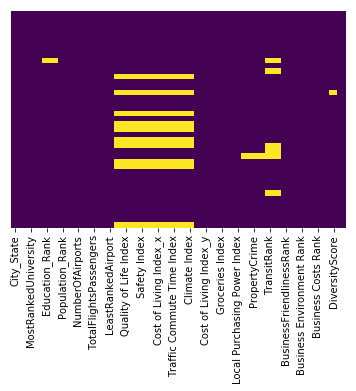

In [120]:
# Let's import the seaborn package
import seaborn as sns

# Let's start by checking missing values
sns.heatmap(df_master.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

We see the presence of missing values in some of the variables

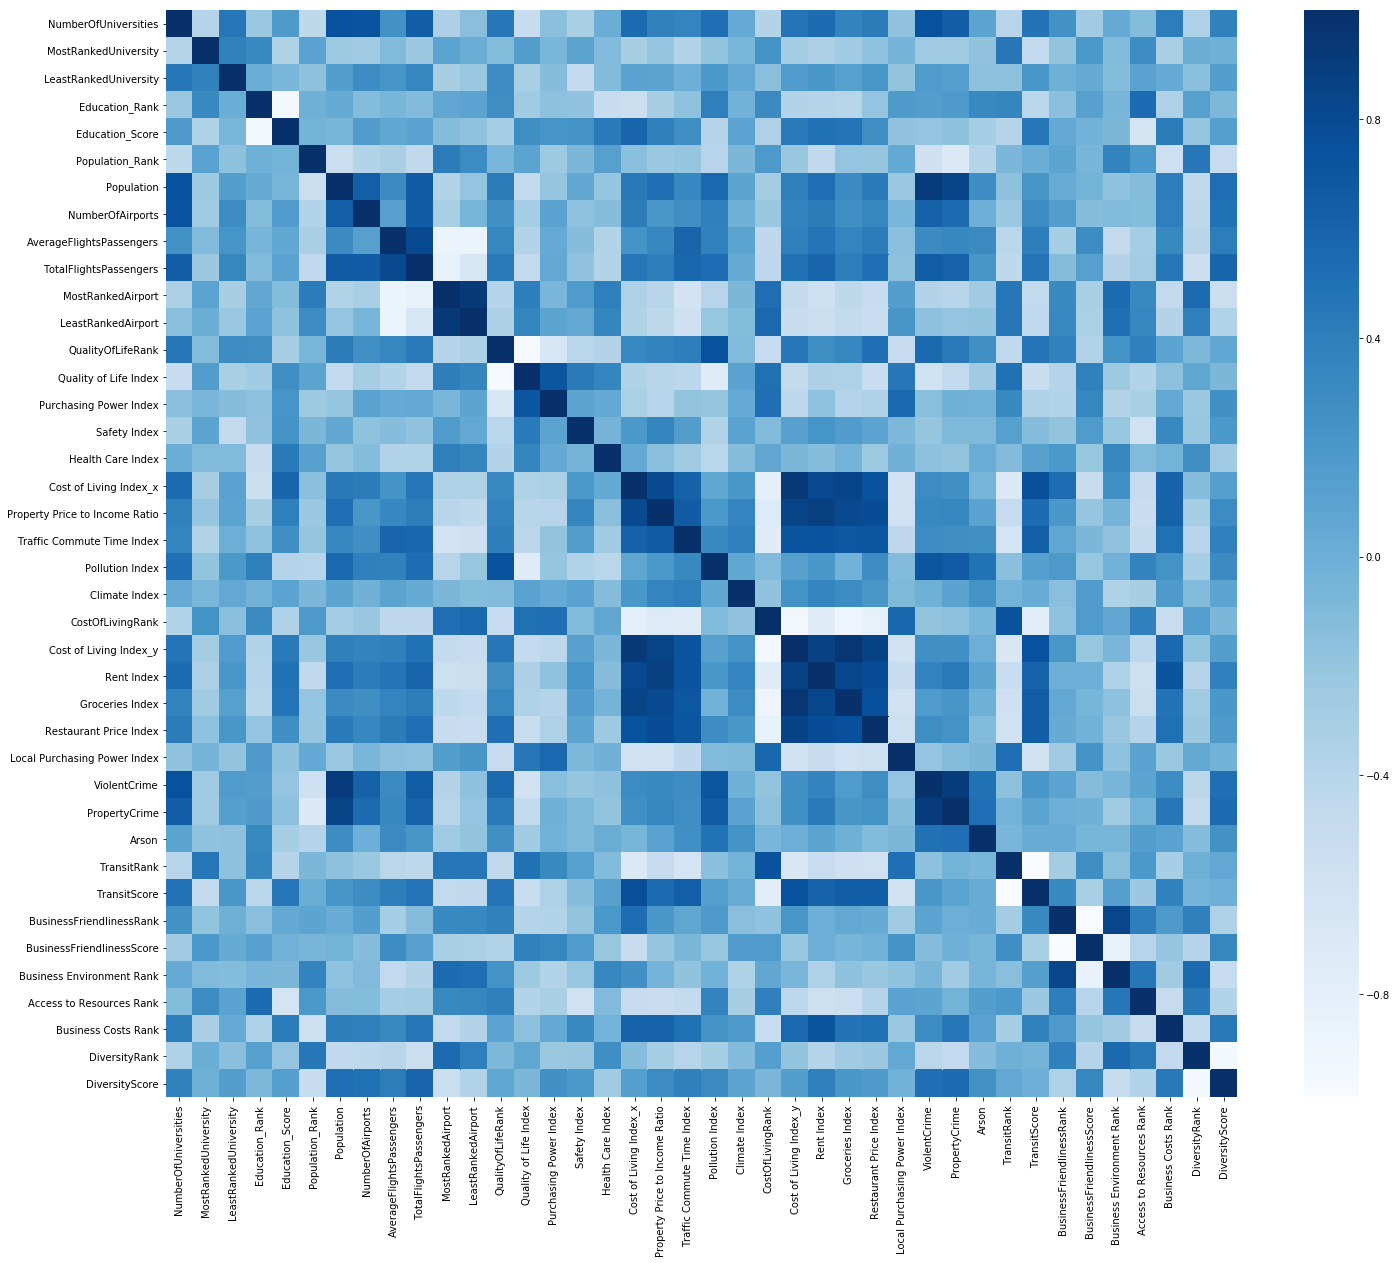

In [121]:
# Now let's check the correlation among variables

# import
import matplotlib.pyplot as plt
%matplotlib inline

# map the correlation
plt.figure(figsize=(24,20))
sns.heatmap(df_master.corr(),cmap='Blues',annot=False) 

##### Observations 

We see a lot of strong correlations among the cost and quality of life variables, as well as the crimes variables. This lead us to believe that some of those variables could be excluded from our model as they might provide the same type of information. We will apply some **features engineering** concepts to identify the most relevant variables. Buit before that we will incorporare the recreational activities data

Please note that Dark shades represents positive correlation while lighter shades represents negative correlation.

#### Adding the recreational activities data

To do that we will use the coordinates of the cities provided in the population data. We will, using Foursquare API, pulling all the venues in a 100 miles radius for each city as well as their categories.

In [137]:
# In the pre-processing steps for the population data we saved the cities coordinates in a separate dataframe, let's go back to check it
display(cities_coord.head(), cities_coord.info(), cities_coord.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 3 columns):
City_State            200 non-null object
Latitude/Longitude    200 non-null object
Area (km²)            200 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


,City_State,Latitude/Longitude,Area (km²)
0,"New York City, NY",40.66/-73.94,778
1,"Los Angeles, CA",34.02/-118.41,1214
2,"Chicago, IL",41.84/-87.68,589
3,"Houston, TX",29.79/-95.39,1649
4,"Phoenix, AZ",33.57/-112.09,1341


None

,Area (km²)
count,200.000000
mean,319.160000
std,418.261723
min,22.000000
25%,121.750000
50%,199.500000
75%,349.250000
max,4420.000000


Looking good, we will apply the following transformation on the data:
* Change the name of New York city from New York City to New York
* split the Latitude/Longitude column into 2 columns and ensure that the datatype is float
* using df_master create a dataframe containing the coordinates only for the cities of interest


In [138]:
# Rename New York City to New York
cities_coord.loc[0,'City_State'] = 'New York, NY'

# Split the Latitude/Longitude column into 2 columns
coordinates = cities_coord["Latitude/Longitude"].str.split("/", expand = True) 
coordinates.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,1
0,40.66,-73.94
1,34.02,-118.41
2,41.84,-87.68
3,29.79,-95.39
4,33.57,-112.09


In [139]:
# Ensuring what the datatypes are
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 2 columns):
0    200 non-null object
1    200 non-null object
dtypes: object(2)
memory usage: 14.7+ KB


In [140]:
# Reintegrate the data into the cities_coord dataframe
cities_coord["Latitude"]= coordinates[0].str.strip().astype(float)
cities_coord["Longitude"]= coordinates[1].str.strip().astype(float)

display(cities_coord.head(), cities_coord.info(), cities_coord.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
City_State            200 non-null object
Latitude/Longitude    200 non-null object
Area (km²)            200 non-null int64
Latitude              200 non-null float64
Longitude             200 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


,City_State,Latitude/Longitude,Area (km²),Latitude,Longitude
0,"New York, NY",40.66/-73.94,778,40.66,-73.94
1,"Los Angeles, CA",34.02/-118.41,1214,34.02,-118.41
2,"Chicago, IL",41.84/-87.68,589,41.84,-87.68
3,"Houston, TX",29.79/-95.39,1649,29.79,-95.39
4,"Phoenix, AZ",33.57/-112.09,1341,33.57,-112.09


None

,Area (km²),Latitude,Longitude
count,200.000000,200.000000,200.000000
mean,319.160000,36.185250,-98.290100
std,418.261723,5.254302,17.164675
min,22.000000,21.320000,-157.850000
25%,121.750000,33.190000,-117.085000
50%,199.500000,35.805000,-96.670000
75%,349.250000,39.780000,-83.017500
max,4420.000000,61.170000,-71.020000


In [141]:
#let's look again at the data
cities_coord[cities_coord['City_State'].str.contains('-|St. ')]

,City_State,Latitude/Longitude,Area (km²),Latitude,Longitude
62,"St. Paul, MN",44.95/-93.10,135,44.95,-93.10
64,"St. Louis, MO",38.64/-90.24,160,38.64,-90.24
75,"St. Petersburg, FL",27.76/-82.64,160,27.76,-82.64
111,"Port St. Lucie, FL",27.28/-80.39,308,27.28,-80.39


In [142]:
#let's replace the abbreviations
cities_coord['City_State'] = cities_coord['City_State'].str.replace('St. ','Saint ')
cities_coord[cities_coord['City_State'].str.contains('St|Saint')]

,City_State,Latitude/Longitude,Area (km²),Latitude,Longitude
61,"Stockton, CA",37.98/-121.31,160,37.98,-121.31
62,"Saint Paul, MN",44.95/-93.10,135,44.95,-93.10
64,"Saint Louis, MO",38.64/-90.24,160,38.64,-90.24
75,"Saint Petersburg, FL",27.76/-82.64,160,27.76,-82.64
111,"Port Saint Lucie, FL",27.28/-80.39,308,27.28,-80.39
198,"Sterling Heights, MI",42.58/-83.03,94,42.58,-83.03


Looking good, let's now only select the cities from the master dataframe

In [143]:
# Create a dataframe with only cities
cities = df_master[['City_State']]

# making the cities name in upper case in the cities_coord dataframe
cities_coord['City_State'] = cities_coord['City_State'].str.upper()

# Merging the 2 dataframes
df_coordinates = pd.merge(cities,cities_coord,on ='City_State', how='left' )

# Display
display(df_coordinates.head(), df_coordinates.info(), df_coordinates.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 5 columns):
City_State            41 non-null object
Latitude/Longitude    41 non-null object
Area (km²)            41 non-null int64
Latitude              41 non-null float64
Longitude             41 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ KB


,City_State,Latitude/Longitude,Area (km²),Latitude,Longitude
0,"LOS ANGELES, CA",34.02/-118.41,1214,34.02,-118.41
1,"SAN FRANCISCO, CA",37.73/-123.03,121,37.73,-123.03
2,"SAN DIEGO, CA",32.82/-117.13,841,32.82,-117.13
3,"DENVER, CO",39.76/-104.88,397,39.76,-104.88
4,"WASHINGTON, DC",38.90/-77.02,158,38.90,-77.02


None

,Area (km²),Latitude,Longitude
count,41.000000,41.000000,41.000000
mean,471.195122,37.038293,-92.560732
std,379.586368,5.759764,18.016488
min,63.000000,21.320000,-157.850000
25%,201.000000,33.760000,-97.750000
50%,348.000000,38.900000,-86.790000
75%,778.000000,40.720000,-80.210000
max,1649.000000,47.620000,-71.020000


Looking good, now using **Foursquare API** let's pull the venues data

##### Recreational activities Data

In [144]:
# Let's start by importing libraries
import requests # library to handle requests
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [145]:
# The code was removed by Watson Studio for sharing.

In [193]:
df_coordinates.City_State

0       LOS ANGELES, CA
1     SAN FRANCISCO, CA
2         SAN DIEGO, CA
3            DENVER, CO
4        WASHINGTON, DC
5           ORLANDO, FL
6             MIAMI, FL
7             TAMPA, FL
8           ATLANTA, GA
9          HONOLULU, HI
10          CHICAGO, IL
11     INDIANAPOLIS, IN
12      NEW ORLEANS, LA
13        BALTIMORE, MD
14           BOSTON, MA
15          DETROIT, MI
16      MINNEAPOLIS, MN
17      KANSAS CITY, MO
18      SAINT LOUIS, MO
19            OMAHA, NE
20        LAS VEGAS, NV
21           NEWARK, NJ
22      ALBUQUERQUE, NM
23         NEW YORK, NY
24          BUFFALO, NY
25           DURHAM, NC
26        CHARLOTTE, NC
27          RALEIGH, NC
28        CLEVELAND, OH
29       CINCINNATI, OH
30         COLUMBUS, OH
31         PORTLAND, OR
32       PITTSBURGH, PA
33     PHILADELPHIA, PA
34        NASHVILLE, TN
35          HOUSTON, TX
36           DALLAS, TX
37      SAN ANTONIO, TX
38           AUSTIN, TX
39          SEATTLE, WA
40        MILWAUKEE, WI
Name: City_State

In [208]:
# Creating a list that contains the names of cities and state codes
addresses = df_coordinates.City_State.tolist()

# getting length of list 
length = len(addresses) 

#initializing a dataframe
df_venues = pd.DataFrame()

for i in range(length):
    #finding latitude and longitude
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(addresses[i])
    latitude = location.latitude
    longitude = location.longitude
    #setting the parameters
    radius = 500
    LIMIT = 100
    # Connecting to Foursquare API
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results_i = requests.get(url).json()
            
    # Now we are ready to clean the json and structure it into a pandas dataframe
    venues_i = results_i['response']['groups'][0]['items']
    
    # putting the dictionary in a dataframe
    df1  = pd.DataFrame(json_normalize(venues_i))
    
    # appending the venues of each city in a single dataframe
    df_venues = pd.concat([df_venues, df1])



/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [209]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']
df_venues = df_venues.loc[:, filtered_columns]

# filter the category for each row
df_venues['venue.categories'] = df_venues.apply(get_category_type, axis=1)

# clean columns
df_venues.columns = [col.split(".")[-1] for col in df_venues.columns]

# display
display(df_venues.head(), df_venues.info(), df_venues.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2636 entries, 0 to 20
Data columns (total 6 columns):
name          2636 non-null object
categories    2636 non-null object
lat           2636 non-null float64
lng           2636 non-null float64
city          2630 non-null object
state         2636 non-null object
dtypes: float64(2), object(4)
memory usage: 144.2+ KB


,name,categories,lat,lng,city,state
0,Grand Park,Park,34.055034,-118.245179,Los Angeles,CA
1,Badmaash,Indian Restaurant,34.051342,-118.244571,Los Angeles,CA
2,Redbird,American Restaurant,34.050666,-118.244068,Los Angeles,CA
3,CVS pharmacy,Pharmacy,34.053426,-118.242107,Los Angeles,CA
4,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246,Los Angeles,CA


None

,lat,lng
count,2636.000000,2636.000000
mean,37.519441,-92.162819
std,5.545658,17.024884
min,21.300232,-157.859939
25%,34.050062,-98.491800
50%,39.102716,-86.775431
75%,41.258634,-80.193701
max,47.607844,-71.053560


In [210]:
# from the result of the info column, it seems like we have rows with no cities,let's take a look at that
df_venues[df_venues.city.isna()]

,name,categories,lat,lng,city,state
2,White House Spring Garden Tour,Garden,38.896325,-77.034264,NaN,"Washington, D.C."
97,Peter Pan At The Aronoff Center,Theater,39.104058,-84.511438,NaN,Ohio
36,Battelle Riverfront Park,Park,39.962756,-83.004603,NaN,Ohio
29,PGH Track 1,Train Station,40.444772,-79.991710,NaN,Pennsylvania
2,City Hall Courtyard,Plaza,39.952484,-75.163592,NaN,Pennsylvania
71,Hatville Deli,Deli / Bodega,39.953575,-75.159537,NaN,Pennsylvania


##### Observations:

* the row record has the state as Washington DC, we will split those among the city and state column
* for the last 5 we would have to google those venues as our original list of cities had one than 1 city for each of the states
* the state column seems to have both state code and state names. We will clean the data and transform all state names into state codes
* the locations seems to have the same indexes, we will reset the indexes for the entire dataframe

In [211]:
# Resetting the indexes
df_venues = df_venues.reset_index(drop=True)

# Pulling the venues with no city name
df_venues[df_venues.city.isna()]

,name,categories,lat,lng,city,state
311,White House Spring Garden Tour,Garden,38.896325,-77.034264,NaN,"Washington, D.C."
1891,Peter Pan At The Aronoff Center,Theater,39.104058,-84.511438,NaN,Ohio
1929,Battelle Riverfront Park,Park,39.962756,-83.004603,NaN,Ohio
2073,PGH Track 1,Train Station,40.444772,-79.991710,NaN,Pennsylvania
2078,City Hall Courtyard,Plaza,39.952484,-75.163592,NaN,Pennsylvania
2147,Hatville Deli,Deli / Bodega,39.953575,-75.159537,NaN,Pennsylvania


In [212]:
# Washington DC venue
df_venues.loc[311,'city'] = 'Washington'
df_venues.loc[311,'state'] = 'DC'

# Ohio venues
df_venues.loc[1891,'city'] = 'CINCINNATI'
df_venues.loc[1891,'state'] = 'OH'

df_venues.loc[1929,'city'] = 'COLUMBUS'
df_venues.loc[1929,'state'] = 'OH'

# Pennsylvania
df_venues.loc[2073,'city'] = 'PITTSBURGH'
df_venues.loc[2073,'state'] = 'PA'

df_venues.loc[2078,'city'] = 'PHILADELPHIA'
df_venues.loc[2078,'state'] = 'PA'

df_venues.loc[2147,'city'] = 'PHILADELPHIA'
df_venues.loc[2147,'state'] = 'PA'

# Checking if the assignment went as expected
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 6 columns):
name          2636 non-null object
categories    2636 non-null object
lat           2636 non-null float64
lng           2636 non-null float64
city          2636 non-null object
state         2636 non-null object
dtypes: float64(2), object(4)
memory usage: 123.6+ KB


Great! Looks like each venue now have a city and state associated with it.

Let's now see the state code

In [215]:
df_venues[(df_venues['state'].str.len() > 2)]

,name,categories,lat,lng,city,state
309,South Lawn - White House,Park,38.895114,-77.036604,Washington,D.C.
310,The Ellipse — President's Park South,Park,38.893855,-77.036605,Washington,D.C.
312,W Washington D.C.,Hotel,38.897005,-77.033425,Washington,D.C.
313,Bliss Spa at W Washington D.C.,Spa,38.896945,-77.033537,Washington,D.C.
314,The West Wing,Government Building,38.897629,-77.038037,Washington,D.C.
315,North Lawn - White House,Park,38.898474,-77.036565,Washington,D.C.
316,Occidental,American Restaurant,38.896507,-77.033040,Washington,D.C.
317,The Willard InterContinental Washington D.C. H...,Hotel,38.897215,-77.032541,Washington,D.C.
318,Old Ebbitt Grill,American Restaurant,38.897954,-77.033270,Washington,D.C.
319,The White House,Government Building,38.898964,-77.036423,Washington,D.C.


In [216]:
# Looks like only DC should be corrected because of the '.'. Let's replace all '.'
df_venues['state'] = df_venues['state'].str.replace('.','')

# Let's confirm
df_venues[(df_venues['state'].str.len() > 2)]

,name,categories,lat,lng,city,state


In [218]:
# Now that the state code has been corrected, we will create a City_State column in line of our existing dataset and create some recreational statistics at the city level

# Creating the City_State column
df_venues['state'] = df_venues['state'].str.upper()
df_venues['city'] = df_venues['city'].str.upper()

df_venues['City_State'] = df_venues['city'].str.strip() +', '+ df_venues['state'].str.strip()

# display

df_venues.head()



,name,categories,lat,lng,city,state,City_State
0,Grand Park,Park,34.055034,-118.245179,LOS ANGELES,CA,"LOS ANGELES, CA"
1,Badmaash,Indian Restaurant,34.051342,-118.244571,LOS ANGELES,CA,"LOS ANGELES, CA"
2,Redbird,American Restaurant,34.050666,-118.244068,LOS ANGELES,CA,"LOS ANGELES, CA"
3,CVS pharmacy,Pharmacy,34.053426,-118.242107,LOS ANGELES,CA,"LOS ANGELES, CA"
4,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246,LOS ANGELES,CA,"LOS ANGELES, CA"


In [223]:
# Add a statistic per city: How many venues do we have per categories and city_state?
df_venues['NumberOfVenues'] = df_venues.groupby(['City_State', 'categories'])['name'].transform('count')
df_venues.head()

,name,categories,lat,lng,city,state,City_State,NumberOfVenues
0,Grand Park,Park,34.055034,-118.245179,LOS ANGELES,CA,"LOS ANGELES, CA",1
1,Badmaash,Indian Restaurant,34.051342,-118.244571,LOS ANGELES,CA,"LOS ANGELES, CA",1
2,Redbird,American Restaurant,34.050666,-118.244068,LOS ANGELES,CA,"LOS ANGELES, CA",2
3,CVS pharmacy,Pharmacy,34.053426,-118.242107,LOS ANGELES,CA,"LOS ANGELES, CA",1
4,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246,LOS ANGELES,CA,"LOS ANGELES, CA",1


In [227]:
# Let's create a dataframe that would provide at the city level the number of venues found in each category
df_cat = pd.pivot_table(df_venues, values='name', columns=['categories'], index=['City_State'], aggfunc='count', fill_value=0)
df_cat.reset_index(level=['City_State'], inplace=True)
df_cat.head()

categories,City_State,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"ALBUQUERQUE, NM",1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"ATLANTA, GA",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"AUSTIN, TX",0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
3,"BALTIMORE, MD",0,0,0,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"BOSTON, MA",0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [228]:
# display our dataframe
display(df_cat.info(), df_cat.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 279 entries, City_State to Yoga Studio
dtypes: int64(278), object(1)
memory usage: 96.0+ KB


None

categories,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.136364,0.045455,0.022727,1.840909,0.068182,0.045455,0.022727,0.318182,0.272727,0.113636,...,0.227273,0.045455,0.022727,0.204545,0.181818,0.363636,0.113636,0.022727,0.022727,0.227273
std,0.408680,0.210707,0.150756,1.598592,0.254972,0.210707,0.150756,0.638775,0.585230,0.386752,...,0.565012,0.210707,0.150756,0.461522,0.445793,0.613450,0.386752,0.150756,0.150756,0.522233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000


Looking good we will join this data with our original df_master to have the entire set of columns.
Following that we will apply **features engineering** techniques to identify the variables needed for our analysis

In [259]:
data = pd.merge(df_master,df_cat,on ='City_State', how='left' )
display(data.info(), data.describe(), data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Columns: 320 entries, City_State to Yoga Studio
dtypes: float64(318), object(2)
memory usage: 102.8+ KB


None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,TotalFlightsPassengers,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
count,41.000000,41.000000,41.000000,40.000000,40.00000,41.000000,4.100000e+01,41.000000,4.100000e+01,4.100000e+01,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.951220,196.414634,534.243902,46.175000,60.02950,32.512195,1.022930e+06,1.170732,1.406197e+07,1.713712e+07,...,0.250000,0.050000,0.025000,0.225000,0.200000,0.400000,0.125000,0.025000,0.025000,0.250000
std,1.465456,198.631691,270.345777,32.097518,9.74432,23.150726,1.421523e+06,0.495098,1.083682e+07,1.528910e+07,...,0.588348,0.220721,0.158114,0.479717,0.464095,0.632456,0.404304,0.158114,0.158114,0.543021
min,1.000000,8.000000,26.000000,3.000000,40.60000,1.000000,2.525550e+05,1.000000,2.303223e+06,2.303223e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,34.000000,313.000000,19.750000,53.05750,15.000000,4.031780e+05,1.000000,5.744918e+06,5.744918e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,151.000000,616.000000,37.500000,58.93000,26.000000,6.621720e+05,1.000000,1.110708e+07,1.110708e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,301.000000,764.000000,70.250000,66.55000,48.000000,8.902280e+05,1.000000,2.156544e+07,2.263912e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,764.000000,934.000000,120.000000,81.54000,87.000000,8.601186e+06,3.000000,5.025196e+07,6.584218e+07,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000


,City_State,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,NumberOfAirports,AverageFlightsPassengers,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"LOS ANGELES, CA",2.0,11.0,115.0,92.0,49.24,2.0,4057841.0,1.0,41232416.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"SAN FRANCISCO, CA",3.0,15.0,863.0,6.0,78.59,14.0,897536.0,1.0,26900016.0,...,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
2,"SAN DIEGO, CA",2.0,501.0,801.0,20.0,66.46,8.0,1453775.0,1.0,11107078.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"DENVER, CO",1.0,301.0,680.0,16.0,69.17,19.0,732144.0,1.0,29809091.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,"WASHINGTON, DC",4.0,109.0,745.0,3.0,81.54,20.0,713549.0,3.0,12195882.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [260]:
# Dropping the citysize column 
data.drop(columns={'CitySize'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Columns: 319 entries, City_State to Yoga Studio
dtypes: float64(318), object(1)
memory usage: 102.5+ KB


#### Features Selection

In this following steps we will be using the VarianceThreshold module to select only relevant features

In [261]:
# Checking the presence of nulls in our dataframe
data.isnull().any()

City_State                        False
NumberOfUniversities              False
MostRankedUniversity              False
LeastRankedUniversity             False
Education_Rank                     True
Education_Score                    True
Population_Rank                   False
Population                        False
NumberOfAirports                  False
AverageFlightsPassengers          False
TotalFlightsPassengers            False
MostRankedAirport                 False
LeastRankedAirport                False
QualityOfLifeRank                  True
Quality of Life Index              True
Purchasing Power Index             True
Safety Index                       True
Health Care Index                  True
Cost of Living Index_x             True
Property Price to Income Ratio     True
Traffic Commute Time Index         True
Pollution Index                    True
Climate Index                      True
CostOfLivingRank                  False
Cost of Living Index_y            False


In [262]:
# We will fill all NAs with 0
data = data.fillna(0)

#sanity check
data.isnull().any()

City_State                        False
NumberOfUniversities              False
MostRankedUniversity              False
LeastRankedUniversity             False
Education_Rank                    False
Education_Score                   False
Population_Rank                   False
Population                        False
NumberOfAirports                  False
AverageFlightsPassengers          False
TotalFlightsPassengers            False
MostRankedAirport                 False
LeastRankedAirport                False
QualityOfLifeRank                 False
Quality of Life Index             False
Purchasing Power Index            False
Safety Index                      False
Health Care Index                 False
Cost of Living Index_x            False
Property Price to Income Ratio    False
Traffic Commute Time Index        False
Pollution Index                   False
Climate Index                     False
CostOfLivingRank                  False
Cost of Living Index_y            False


Looking good. Now we can start selecting the features. We will be removing constant, quasi-constant, highly correlated and low variance features

Constant features are defined as features with values with zero variance.
Quasi-constant features as defined as features that are almost constant. We will consider as quasi-constant features that have more than 99% similar values.


In [263]:
#importing the library
from sklearn.feature_selection import VarianceThreshold

# To use this all the columns should have a numeric datatypes, we will set the City names as the index
data = data.set_index('City_State')


In [264]:
# Removing constant features

#Create the filter
constant_filter = VarianceThreshold(threshold=0)

#apply the filter to our data
constant_filter.fit(data)

#Now to get all the features that are not constant
print(len(data.columns[constant_filter.get_support()]))

# Constant columns
constant_columns = [column for column in data.columns
                    if column not in data.columns[constant_filter.get_support()]]

#Finally, let's drop all constant columns from our dataset
df_data = data.drop(labels=constant_columns, axis=1)

#Let's look at the shape of our dataframe
df_data.shape

317


(41, 317)

In [266]:
# Removing quasi-constant features

#Create the filter
qconstant_filter = VarianceThreshold(threshold=0.01)

#apply the filter to our data
qconstant_filter.fit(df_data)

#Now to get all the features that are not constant
print(len(df_data.columns[qconstant_filter.get_support()]))

# Quasi constant columns
qconstant_columns = [column for column in df_data.columns
                    if column not in df_data.columns[qconstant_filter.get_support()]]

#Finally, let's drop all quasi constant columns from our dataset
df_data.drop(labels=qconstant_columns, axis=1, inplace=True)

#Let's look at the shape of our dataframe
df_data.shape

317


(41, 317)

In [267]:
# removing correlated features

# Let's create an empty set that will contain all the correlated features
correlated_features = set()

#Let's create correlation matrix for the columns in the dataset
correlation_matrix = df_data.corr()

In [268]:
# Let's loop through all the columns in the correlation_matrix and add the columns with an absolute correlation value of 0.8 to the correlated_features

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [269]:
#Let's see the total number of highly correlated columns in our dataset
len(correlated_features)

90

In [270]:
# let's drop all the highly correlated columns from our dataset
df_data.drop(labels=correlated_features, axis=1, inplace=True)

#Let's look at the shape of our dataframe
df_data.shape

(41, 227)

In [272]:
# Removing low variance features

#Create the filter
variance_filter = VarianceThreshold(threshold=0.5)

#apply the filter to our data
variance_filter.fit(df_data)

#Now to get all the features that are not constant
print(len(df_data.columns[variance_filter.get_support()]))

# Quasi constant columns
variance_columns = [column for column in df_data.columns
                    if column not in df_data.columns[variance_filter.get_support()]]

#Finally, let's drop all quasi constant columns from our dataset
featured_data = df_data.drop(labels=variance_columns, axis=1)

#Let's look at the shape of our dataframe
featured_data.shape

54


(41, 54)

In [273]:
# Let's take a look at our final dataframe
display(featured_data.head(), featured_data.info(), featured_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, LOS ANGELES, CA to MILWAUKEE, WI
Data columns (total 54 columns):
NumberOfUniversities              41 non-null float64
MostRankedUniversity              41 non-null float64
LeastRankedUniversity             41 non-null float64
Education_Rank                    41 non-null float64
Education_Score                   41 non-null float64
Population_Rank                   41 non-null float64
Population                        41 non-null float64
AverageFlightsPassengers          41 non-null float64
QualityOfLifeRank                 41 non-null float64
Quality of Life Index             41 non-null float64
Property Price to Income Ratio    41 non-null float64
CostOfLivingRank                  41 non-null float64
Local Purchasing Power Index      41 non-null float64
Arson                             41 non-null float64
TransitRank                       41 non-null float64
TransitScore                      41 non-null float64
BusinessFrien

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,AverageFlightsPassengers,QualityOfLifeRank,Quality of Life Index,...,Park,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Sandwich Place,Steakhouse,Sushi Restaurant,Theater
City_State,,,,,,,,,,,,,,,,,,,,,
"LOS ANGELES, CA",2.0,11.0,115.0,92.0,49.24,2.0,4057841.0,41232416.0,43.0,149.96,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
"SAN FRANCISCO, CA",3.0,15.0,863.0,6.0,78.59,14.0,897536.0,26900016.0,23.0,173.05,...,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0
"SAN DIEGO, CA",2.0,501.0,801.0,20.0,66.46,8.0,1453775.0,11107078.0,9.0,190.93,...,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,3.0,2.0
"DENVER, CO",1.0,301.0,680.0,16.0,69.17,19.0,732144.0,29809091.0,28.0,169.60,...,1.0,2.0,0.0,2.0,1.0,1.0,6.0,0.0,0.0,0.0
"WASHINGTON, DC",4.0,109.0,745.0,3.0,81.54,20.0,713549.0,12195882.0,26.0,170.79,...,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


None

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,AverageFlightsPassengers,QualityOfLifeRank,Quality of Life Index,...,Park,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Sandwich Place,Steakhouse,Sushi Restaurant,Theater
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,4.100000e+01,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1.951220,196.414634,534.243902,45.048780,58.565366,32.512195,1.022930e+06,1.406197e+07,17.341463,131.889756,...,1.048780,1.463415,0.682927,0.560976,0.926829,0.463415,2.292683,1.097561,0.609756,0.829268
std,1.465456,198.631691,270.345777,32.503808,13.433883,23.150726,1.421523e+06,1.083682e+07,15.602259,77.162836,...,1.116943,1.398170,0.756275,0.923276,1.330230,0.777739,1.887378,1.562128,0.770651,1.181153
min,1.000000,8.000000,26.000000,0.000000,0.000000,1.000000,2.525550e+05,2.303223e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,34.000000,313.000000,19.000000,52.900000,15.000000,4.031780e+05,5.744918e+06,1.000000,141.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,151.000000,616.000000,37.000000,58.850000,26.000000,6.621720e+05,1.110708e+07,15.000000,168.580000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,301.000000,764.000000,70.000000,66.460000,48.000000,8.902280e+05,2.156544e+07,30.000000,178.510000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000
max,8.000000,764.000000,934.000000,120.000000,81.540000,87.000000,8.601186e+06,5.025196e+07,47.000000,217.810000,...,4.000000,5.000000,2.000000,3.000000,5.000000,3.000000,9.000000,6.000000,3.000000,4.000000


This concludes our feature selection process. In the following and final section we will cluster our cities and provide a ranking to the final cities relative to our benchmark city Seattle, WA

#### Clustering and Ranking

In this fourth and final step, with Seattle Washington as our benchmark, we will cluster the cities to identify which ones have similar characteristics as our benchmark using **k-means clustering**. We will also, using the correlation coefficicient, rank our recommended cities

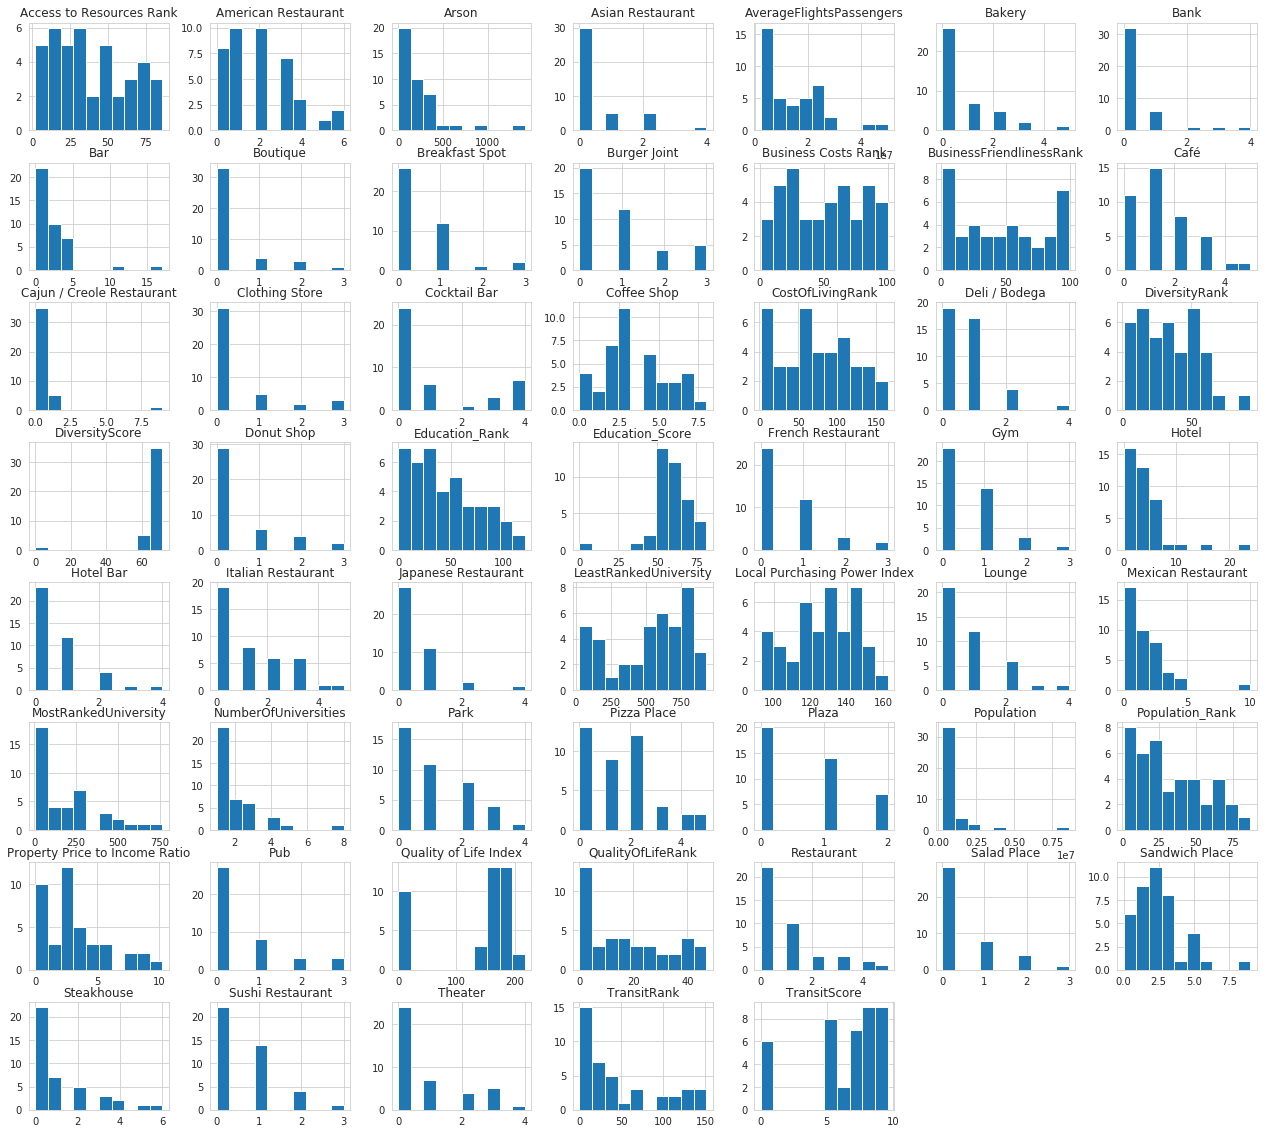

In [275]:
# First let's look at the histograms of our data
import seaborn as sns
featured_data.hist(figsize=(22,20));

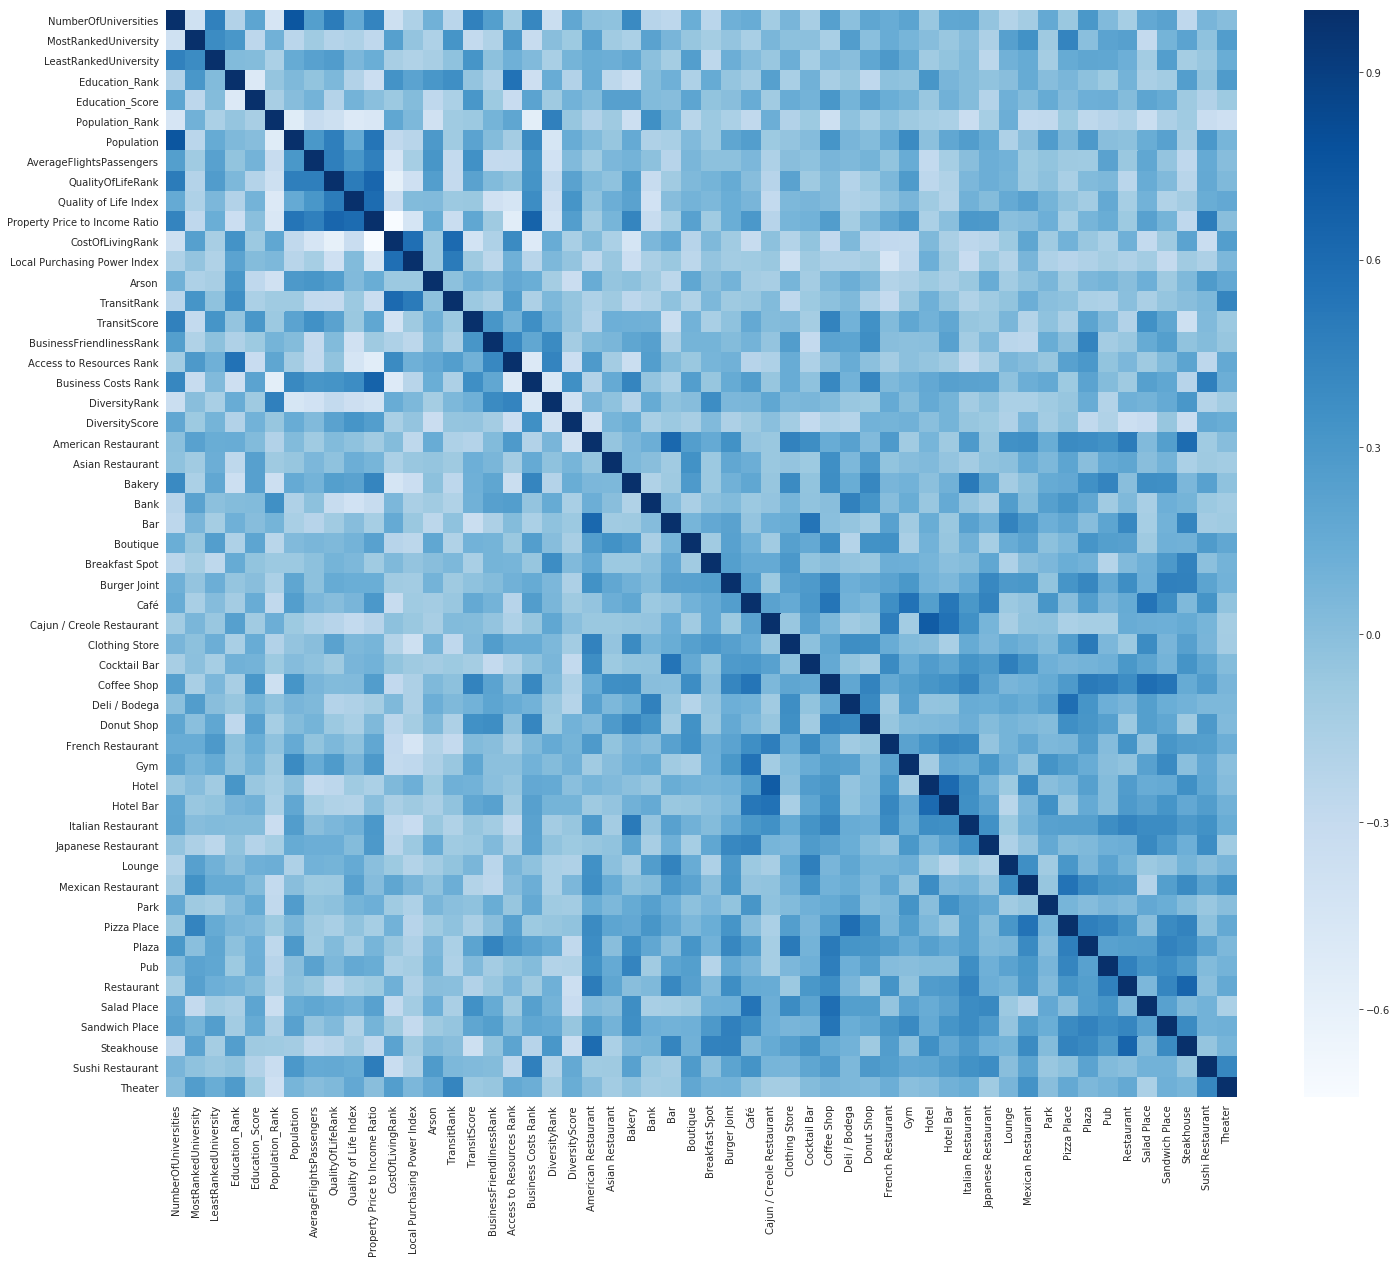

In [277]:
#Let's also take a look at the correlation
plt.figure(figsize=(24,20))
sns.heatmap(featured_data.corr(),cmap='Blues',annot=False) 

In [278]:
#importing the library
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

#initializing
X = featured_data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

#Clustering
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 0 1 0 1 1 0 2 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0]


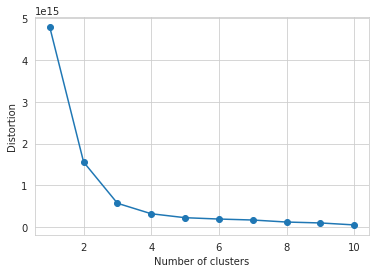

In [283]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we can see in the resulting plot, the elbow is located at k = 4, which is evidence that k = 3 is not a good choice for this dataset. We will run our model now with k = 4

In [284]:
#Clustering with k = 4
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 3 2 3 2 2 3 1 3 2 0 0 3 2 2 2 0 0 0 2 2 0 2 0 0 2 0 0 0 0 3 0 3 0 3 2
 0 0 2 0]


In [285]:
# Adding the labels column in our dataset
featured_data["Clus_km"] = labels
featured_data.head(5)

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,AverageFlightsPassengers,QualityOfLifeRank,Quality of Life Index,...,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Sandwich Place,Steakhouse,Sushi Restaurant,Theater,Clus_km
City_State,,,,,,,,,,,,,,,,,,,,,
"LOS ANGELES, CA",2.0,11.0,115.0,92.0,49.24,2.0,4057841.0,41232416.0,43.0,149.96,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1
"SAN FRANCISCO, CA",3.0,15.0,863.0,6.0,78.59,14.0,897536.0,26900016.0,23.0,173.05,...,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0,2
"SAN DIEGO, CA",2.0,501.0,801.0,20.0,66.46,8.0,1453775.0,11107078.0,9.0,190.93,...,2.0,2.0,1.0,0.0,0.0,2.0,0.0,3.0,2.0,3
"DENVER, CO",1.0,301.0,680.0,16.0,69.17,19.0,732144.0,29809091.0,28.0,169.60,...,2.0,0.0,2.0,1.0,1.0,6.0,0.0,0.0,0.0,2
"WASHINGTON, DC",4.0,109.0,745.0,3.0,81.54,20.0,713549.0,12195882.0,26.0,170.79,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3


In [286]:
# Given that Seattle, WA is our benchmark, let's pull it's information to identify the cluster it belongs to
featured_data.loc['SEATTLE, WA']

NumberOfUniversities                     1.00
MostRankedUniversity                    10.00
LeastRankedUniversity                   66.00
Education_Rank                           8.00
Education_Score                         73.10
Population_Rank                         18.00
Population                          766893.00
AverageFlightsPassengers          22639120.00
QualityOfLifeRank                       10.00
Quality of Life Index                  188.03
Property Price to Income Ratio           5.68
CostOfLivingRank                        14.00
Local Purchasing Power Index           144.60
Arson                                  149.00
TransitRank                             24.00
TransitScore                             8.10
BusinessFriendlinessRank                59.00
Access to Resources Rank                 7.00
Business Costs Rank                     95.00
DiversityRank                           49.00
DiversityScore                          65.51
American Restaurant               

From the results above we see that Seattle belongs to Cluster label 2. In the following steps we will retrieve all cities labelled in Cluster 2 and rank them relative to their similarity to Seattle, WA

In [287]:
# Creating a dataframe with cities in Cluster #2
final_cities = featured_data[featured_data['Clus_km']==2]

# Display
display(final_cities.head(), final_cities.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, SAN FRANCISCO, CA to SEATTLE, WA
Data columns (total 55 columns):
NumberOfUniversities              14 non-null float64
MostRankedUniversity              14 non-null float64
LeastRankedUniversity             14 non-null float64
Education_Rank                    14 non-null float64
Education_Score                   14 non-null float64
Population_Rank                   14 non-null float64
Population                        14 non-null float64
AverageFlightsPassengers          14 non-null float64
QualityOfLifeRank                 14 non-null float64
Quality of Life Index             14 non-null float64
Property Price to Income Ratio    14 non-null float64
CostOfLivingRank                  14 non-null float64
Local Purchasing Power Index      14 non-null float64
Arson                             14 non-null float64
TransitRank                       14 non-null float64
TransitScore                      14 non-null float64
BusinessFrien

,NumberOfUniversities,MostRankedUniversity,LeastRankedUniversity,Education_Rank,Education_Score,Population_Rank,Population,AverageFlightsPassengers,QualityOfLifeRank,Quality of Life Index,...,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Sandwich Place,Steakhouse,Sushi Restaurant,Theater,Clus_km
City_State,,,,,,,,,,,,,,,,,,,,,
"SAN FRANCISCO, CA",3.0,15.0,863.0,6.0,78.59,14.0,897536.0,26900016.0,23.0,173.05,...,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0,2
"DENVER, CO",1.0,301.0,680.0,16.0,69.17,19.0,732144.0,29809091.0,28.0,169.60,...,2.0,0.0,2.0,1.0,1.0,6.0,0.0,0.0,0.0,2
"ORLANDO, FL",1.0,301.0,751.0,67.0,53.48,68.0,297243.0,21565444.0,32.0,166.18,...,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2
"MIAMI, FL",1.0,401.0,801.0,80.0,51.16,40.0,491724.0,20709205.0,42.0,155.01,...,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2
"CHICAGO, IL",5.0,9.0,801.0,31.0,60.53,3.0,2679044.0,24752499.0,41.0,155.28,...,3.0,1.0,3.0,1.0,1.0,5.0,0.0,1.0,2.0,2


None

Looking good. We will now calculate the correlation of each city in the final set to Seattle to determine the rank

In [290]:
# Pivoting the data set
final_cities_pivot = final_cities.pivot_table(columns='City_State')

# Creating the benchmark
benchmark = final_cities_pivot['SEATTLE, WA']

# Calculating the correlation
similar_to_seattle = final_cities_pivot.corrwith(benchmark)

# Saving in a dataframe
corr_seattle = pd.DataFrame(similar_to_seattle, columns=['Correlation'])

# Sorting the data
corr_seattle = corr_seattle.sort_values(by='Correlation', ascending=False)

# Display
corr_seattle.head()

,Correlation
City_State,
"SEATTLE, WA",1.000000
"SAN FRANCISCO, CA",1.000000
"BOSTON, MA",0.999997
"DETROIT, MI",0.999991
"LAS VEGAS, NV",0.999985


In [291]:
#Adding a rank column to our dataset
initial_value = 0

corr_seattle['Rank'] = range(initial_value, len(corr_seattle) +initial_value)

corr_seattle.head()

,Correlation,Rank
City_State,,
"SEATTLE, WA",1.000000,0
"SAN FRANCISCO, CA",1.000000,1
"BOSTON, MA",0.999997,2
"DETROIT, MI",0.999991,3
"LAS VEGAS, NV",0.999985,4


In [292]:
corr_seattle

,Correlation,Rank
City_State,,
"SEATTLE, WA",1.000000,0
"SAN FRANCISCO, CA",1.000000,1
"BOSTON, MA",0.999997,2
"DETROIT, MI",0.999991,3
"LAS VEGAS, NV",0.999985,4
"CHARLOTTE, NC",0.999979,5
"DENVER, CO",0.999957,6
"MIAMI, FL",0.999949,7
"MINNEAPOLIS, MN",0.999933,8


## Results and Discussion <a name="results"></a>

Our analysis shows that 13 cities could potentially answer the needs of the company among the ~4000 cities we started with.
The correlation results show that San Francisco, CA characteristics are extremely similar to Seattle's however the decision the company would have to make is to decide if they want to branch out on the East Cost of the country in which case, Boston, MA would be the best candidate.



## Conclusion <a name="conclusion"></a>

The purpose of this project was to identify and recommend the best cities to house a second Technologiacl Center that would have similar characteristics as Seattle, WA in order to aid stakeholders in narrowing down the search for optimal location. By using several sources that were in line with the company's requirements we have first identify 41 cities that would meet the basic needs of the company. 
Clustering of those locations was then performed in order to further reduce the list to the cities with similar characteristics as Seattle, WA.

The final decission on optimal location will be made by stakeholders based on specific characteristics in every recommended city, taking into consideration additional factors like the business environment, incentives and competitors, real estate availability and etc...
